# Credit EDA Case Study
In this case study, we will have understanding of risk analytics in banking and financial services and understand how to minimise the risk of losing money while lending to customers. We will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

### Problem Statement

The banking and financial company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.


In [1]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Filter out warnings
import warnings

warnings.filterwarnings('ignore')

In [166]:
# Display all rows and columns in the dataset for better visuals and analysis
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
# Read the application dataset
df_a = pd.read_csv("application_data.csv")
df_a.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
df_a.shape

(307511, 122)

In [7]:
df_a.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
#Get the number of missing values for the all the column of dataset
df_a.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [9]:
#Get the percentage of missing values for the all the column of dataset
(df_a.isna().sum()/len(df_a))*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [10]:
##Drop all the columns which has missing values more than 40% from the dataset
df_a.drop(df_a.loc[:,'EXT_SOURCE_1':'EMERGENCYSTATE_MODE'].columns, axis= 1, inplace= True)

In [11]:
#Drop all the unnecessary columns from the dataset
df_a.drop(df_a.loc[:,'REGION_RATING_CLIENT':'LIVE_CITY_NOT_WORK_CITY'].columns, axis= 1, inplace= True)
df_a.drop(df_a.loc[:,'DAYS_LAST_PHONE_CHANGE':'AMT_REQ_CREDIT_BUREAU_YEAR'].columns, axis= 1, inplace= True)
df_a.drop(df_a.loc[:,'DAYS_REGISTRATION':'FLAG_EMAIL'].columns, axis= 1, inplace= True)
del df_a['REGION_POPULATION_RELATIVE']
del df_a['NAME_TYPE_SUITE']

In [12]:
# Check null percentages in the dataset after removing the columns
(df_a.isna().sum()/len(df_a))*100

SK_ID_CURR                   0.000000
TARGET                       0.000000
NAME_CONTRACT_TYPE           0.000000
CODE_GENDER                  0.000000
FLAG_OWN_CAR                 0.000000
FLAG_OWN_REALTY              0.000000
CNT_CHILDREN                 0.000000
AMT_INCOME_TOTAL             0.000000
AMT_CREDIT                   0.000000
AMT_ANNUITY                  0.003902
AMT_GOODS_PRICE              0.090403
NAME_INCOME_TYPE             0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_FAMILY_STATUS           0.000000
NAME_HOUSING_TYPE            0.000000
DAYS_BIRTH                   0.000000
DAYS_EMPLOYED                0.000000
OCCUPATION_TYPE             31.345545
CNT_FAM_MEMBERS              0.000650
ORGANIZATION_TYPE            0.000000
OBS_30_CNT_SOCIAL_CIRCLE     0.332021
DEF_30_CNT_SOCIAL_CIRCLE     0.332021
OBS_60_CNT_SOCIAL_CIRCLE     0.332021
DEF_60_CNT_SOCIAL_CIRCLE     0.332021
dtype: float64

In [13]:
#Count of null values in the field OBS_30_CNT_SOCIAL_CIRCLE
df_a['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [14]:
#Count of null values in the field DEF_30_CNT_SOCIAL_CIRCLE
df_a['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [15]:
#Count of null values in the field OBS_60_CNT_SOCIAL_CIRCLE
df_a['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [16]:
#Count of null values in the field DEF_60_CNT_SOCIAL_CIRCLE
df_a['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [17]:
#Check the values of observation field in percentage
df_a['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True)*100

0.0      53.479722
1.0      15.916669
2.0       9.725603
3.0       6.630559
4.0       4.614506
5.0       3.116904
6.0       2.105452
7.0       1.432347
8.0       0.968058
9.0       0.653529
10.0      0.448954
11.0      0.277986
12.0      0.212731
13.0      0.134099
14.0      0.084179
15.0      0.054162
16.0      0.043395
17.0      0.028712
18.0      0.015009
19.0      0.014356
20.0      0.009788
21.0      0.009462
22.0      0.007178
23.0      0.004894
24.0      0.003589
25.0      0.003589
27.0      0.001631
26.0      0.000979
30.0      0.000653
28.0      0.000326
348.0     0.000326
29.0      0.000326
47.0      0.000326
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

The null value count is 1021 which is the 0.33% of the total data in the dataset.
These null values can be imputed with 0 since more than 50% of the values in column is 0

In [18]:
#Check the values of observation field in percentage
df_a['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True)*100

0.0     88.526216
1.0      9.242716
2.0      1.736761
3.0      0.388920
4.0      0.082548
5.0      0.018271
6.0      0.003589
7.0      0.000326
8.0      0.000326
34.0     0.000326
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

The null value count is 1021 which is the 0.33% of the total data in the dataset.
These null values can be imputed with 0 since more than 80% of the values in column is 0

In [19]:
#Check the values of observation field in percentage
df_a['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True)*100

0.0      53.726386
1.0      15.945055
2.0       9.711899
3.0       6.595647
4.0       4.550230
5.0       3.087540
6.0       2.071519
7.0       1.417338
8.0       0.941629
9.0       0.639173
10.0      0.435577
11.0      0.273092
12.0      0.202290
13.0      0.130836
14.0      0.077653
15.0      0.054162
16.0      0.044700
17.0      0.023818
18.0      0.015987
19.0      0.014356
20.0      0.009788
21.0      0.009136
22.0      0.006525
23.0      0.004242
24.0      0.003915
25.0      0.003589
27.0      0.001631
29.0      0.000653
28.0      0.000326
344.0     0.000326
47.0      0.000326
26.0      0.000326
30.0      0.000326
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

The null value count is 1021 which is the 0.33% of the total data in the dataset.
These null values can be imputed with 0 since more than 50% of the values in column is 0

In [20]:
#Check the values of observation field in percentage
df_a['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True)*100

0.0     91.592222
1.0      7.126171
2.0      1.034291
3.0      0.195112
4.0      0.044047
5.0      0.006525
6.0      0.000979
24.0     0.000326
7.0      0.000326
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

The null value count is 1021 which is the 0.33% of the total data in the dataset.
These null values can be imputed with 0 since more than 90% of the values in column is 0

##### Therefore, Below columns NaN can be imputed to 0 since large value of columns is 0 - 
##### OBS_30_CNT_SOCIAL_CIRCLE
##### OBS_60_CNT_SOCIAL_CIRCLE
##### DEF_30_CNT_SOCIAL_CIRCLE
##### DEF_60_CNT_SOCIAL_CIRCLE

In [21]:
#Get the value counts of code gender
df_a['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [22]:
#Replace XNA value with NaN
df_a[['CODE_GENDER']]= df_a[['CODE_GENDER']].replace('XNA', np.nan)

In [24]:
#Remove record with null values from code gender
df_a = df_a[~(df_a['CODE_GENDER'].isnull())]

In [25]:
#Check null records data in Amount Annuity
df_a[df_a['AMT_ANNUITY'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10668,-2523,High skill tech staff,1.0,Business Entity Type 3,1.0,0.0,1.0,0.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Working,Lower secondary,Civil marriage,House / apartment,-9027,-1270,Laborers,2.0,Business Entity Type 1,0.0,0.0,0.0,0.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Working,Secondary / secondary special,Married,House / apartment,-17376,-3950,Cooking staff,2.0,Self-employed,1.0,0.0,1.0,0.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,State servant,Higher education,Married,House / apartment,-11329,-2040,Core staff,2.0,Government,0.0,0.0,0.0,0.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,360000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19762,-2498,Laborers,1.0,Other,0.0,0.0,0.0,0.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,166500.0,Working,Higher education,Single / not married,Rented apartment,-20831,-2450,Drivers,1.0,Business Entity Type 3,0.0,0.0,0.0,0.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,157500.0,State servant,Secondary / secondary special,Married,House / apartment,-12134,-3721,Medicine staff,2.0,Medicine,0.0,0.0,0.0,0.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,720000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13902,-3540,Secretaries,2.0,Self-employed,0.0,0.0,0.0,0.0
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,486000.0,Commercial associate,Higher education,Married,House / apartment,-10151,-472,Security staff,2.0,Security,0.0,0.0,0.0,0.0
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,499500.0,Commercial associate,Higher education,Married,Municipal apartment,-16344,-1478,Sales staff,2.0,Business Entity Type 3,1.0,0.0,1.0,0.0


##### AMT_Annuity are loans that are paid back over a set period of time at a set interest rate with consistent payments each period. A mortgage or car loan are one of the examples of an annuity. In this case, the values of Annuity amount is null, then it can be considered as the No Loan/Mortgage was taken so the value can be 0.

##### Therefore, Amount Annuity - AMT_ANNUITY  NaN can be imputed to 0

In [26]:
#Impute  null value with 0
df_a['AMT_ANNUITY'].fillna(0, inplace=True)

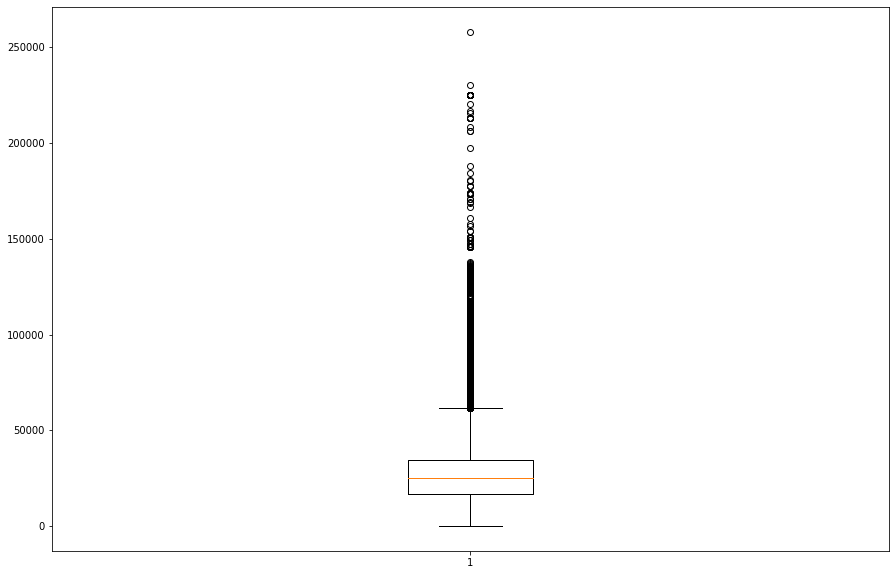

In [27]:
# Check outliers in the Amount Annuity
plt.figure(figsize=(15,10))
plt.boxplot(df_a['AMT_ANNUITY'])
plt.show()

Checking the outliers but it doesn't looks it has any. Although the values have a variations, lets check quantile values.

In [28]:
df_a['AMT_ANNUITY'].quantile([0.5,0.7,0.9,0.95,0.99,1.0])

0.50     24903.0
0.70     32004.0
0.90     45954.0
0.95     53325.0
0.99     70006.5
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

In [29]:
df_a['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27569
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2092
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [30]:
df_a['OCCUPATION_TYPE'].isnull().sum()

96389

In [31]:
# Create a Range for Credit Amount so that analysis could be more accurate.
bins = [0,500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000,5000000]
ranges = ['0-500000', '500000-1000000','1000000-1500000', '1500000-2000000', '2000000-2500000', '2500000-3000000','3500000-4000000','4000000-5000000','5000000 and above']
df_a['AMT_CREDIT_RANGE']=pd.cut(df_a['AMT_CREDIT'],bins=bins,labels=ranges)

In [33]:
#Get the count of Amount Credit Range
df_a['AMT_CREDIT_RANGE'].value_counts(normalize=True)

0-500000             0.485615
500000-1000000       0.351836
1000000-1500000      0.127571
1500000-2000000      0.028380
2000000-2500000      0.005424
2500000-3000000      0.001070
3500000-4000000      0.000059
5000000 and above    0.000033
4000000-5000000      0.000013
Name: AMT_CREDIT_RANGE, dtype: float64

In [34]:
# Count of TARGET column values in percent
df_a.TARGET.value_counts(normalize=True)*100

0    91.927013
1     8.072987
Name: TARGET, dtype: float64

##### Bifurcate Dataset into two groups as Target =1 and Target=0 for payment with issues and No issues respectively.

In [36]:
# Create two dataset for Target =1 and Target =0.
df_a1 = df_a[df_a['TARGET']==1]
df_a0 = df_a[df_a['TARGET']==0]

In [37]:
# Check the records for Target=1
df_a1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,Laborers,1.0,Business Entity Type 3,2.0,2.0,2.0,2.0,0-500000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,-18724,-2628,Cooking staff,1.0,Business Entity Type 3,10.0,1.0,10.0,0.0,500000-1000000
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17482,-1262,Laborers,2.0,Business Entity Type 3,0.0,0.0,0.0,0.0,1000000-1500000
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13384,-3597,Sales staff,2.0,Self-employed,1.0,0.0,1.0,0.0,0-500000
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24794,365243,NaN,2.0,XNA,1.0,1.0,1.0,1.0,0-500000


### Analysis for Customers with payment with issues in dataset(Target=1)

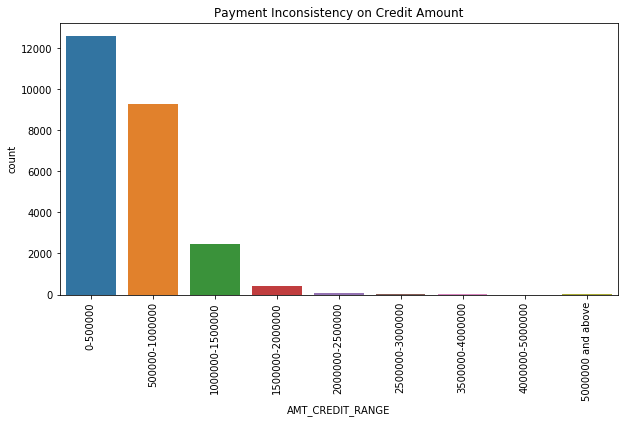

In [38]:
#For Target=1, plot the graph of payment inconsistencies in Credit Amount

plt.figure(figsize=(10,5))
sns.countplot(df_a1['AMT_CREDIT_RANGE'])
plt.title("Payment Inconsistency on Credit Amount")
plt.xticks(rotation=90)
plt.show()

We can see that higher payment inconsitencies found in those who have recieved credit amount less than 10 lakhs. Perhaps that might be due to higher number of people who opted for loan amount less than 10 lakhs.

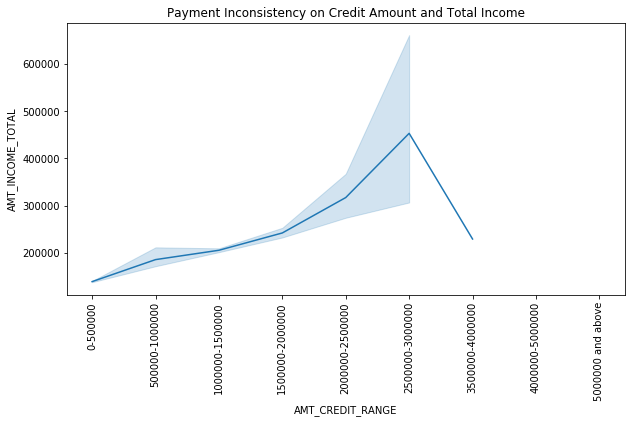

In [39]:
# Plot the graph for payment inconsistencies on Credit Amount and Total Income
plt.figure(figsize=(10,5))
sns.lineplot(df_a1['AMT_CREDIT_RANGE'],df_a1['AMT_INCOME_TOTAL'])
plt.title("Payment Inconsistency on Credit Amount and Total Income")
plt.xticks(rotation=90)
plt.show()

As per the graph obtained above on the relation of Amount Credit vs Annual Income in Inconsistent payment dataset-The Amount Credit is quite high for the Annual Income and this trend increases with the increase in income till the slab of 30 lakh but after that there is a trend that lower income group has also got a higher credit which might be a good reason of getting default.

In [40]:
# Analysis of Amount Income Total
df_a1['AMT_INCOME_TOTAL'].describe()

count    2.482500e+04
mean     1.656118e+05
std      7.466770e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.350000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [41]:
#For Anlaysis of Target =1 data
df_a1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,24825.000000,24825.0,24825.000000,2.482500e+04,2.482500e+04,24825.000000,2.480400e+04,24825.000000,24825.000000,24825.000000,24789.000000,24789.000000,24789.000000,24789.000000
mean,277449.167936,1.0,0.463807,1.656118e+05,5.577785e+05,26481.744290,4.889724e+05,-14884.828077,42394.675448,2.181269,1.496147,0.191980,1.477672,0.138247
std,102383.123458,0.0,0.756903,7.466770e+05,3.464332e+05,12450.676999,3.116365e+05,4192.844583,119484.634253,0.951327,2.378438,0.516524,2.355908,0.427645
min,100002.000000,1.0,0.000000,2.565000e+04,4.500000e+04,2722.500000,4.500000e+04,-25168.000000,-16069.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,189555.000000,1.0,0.000000,1.125000e+05,2.844000e+05,17361.000000,2.385000e+05,-18037.000000,-2156.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,276291.000000,1.0,0.000000,1.350000e+05,4.975200e+05,25263.000000,4.500000e+05,-14282.000000,-1034.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,366050.000000,1.0,1.000000,2.025000e+05,7.333155e+05,32976.000000,6.750000e+05,-11396.000000,-379.000000,3.000000,2.000000,0.000000,2.000000,0.000000
max,456254.000000,1.0,11.000000,1.170000e+08,4.027680e+06,149211.000000,3.600000e+06,-7678.000000,365243.000000,13.000000,30.000000,6.000000,29.000000,5.000000


In [42]:
#Get the values of AMT_INCOME_TOTAL in quantile variations
df_a1['AMT_INCOME_TOTAL'].quantile([0.5,0.7,0.9,0.95,0.99,1.0])

0.50       135000.0
0.70       180000.0
0.90       256500.0
0.95       315000.0
0.99       450000.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

##### Looks there is some unusual high values in AMT_INCOME_TOTAL, lets check the Box-Plot

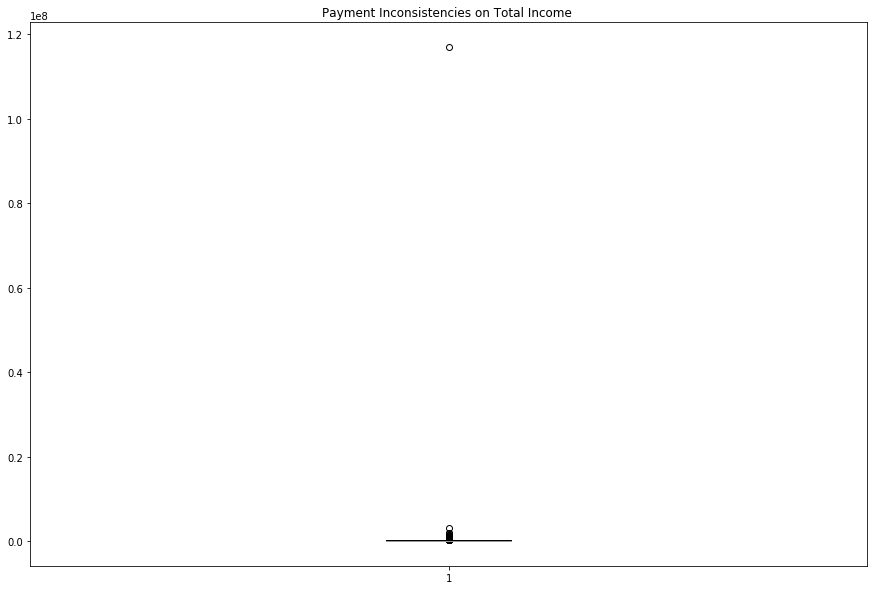

In [44]:
#Plot the graph of Amount Income Total values
plt.figure(figsize=(15,10))
plt.boxplot(df_a1['AMT_INCOME_TOTAL'])
plt.title('Payment Inconsistencies on Total Income ')
plt.show()

Now it is clear the there is an outlier in this variable, lets check which occupation has such values.

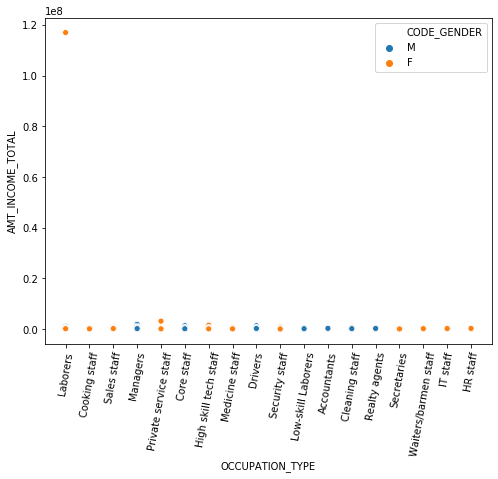

In [45]:
# Get the AMT_INCOME_TOTAL graph against the OCCUPATION_TYPE, to check amount based on Occupation Type.
plt.figure(figsize=(8,6))
sns.scatterplot(data = df_a1, x = 'OCCUPATION_TYPE', y = 'AMT_INCOME_TOTAL',hue = 'CODE_GENDER')
plt.xticks(rotation = 80)

plt.show()

As per the graph above, the value of AMT_INCOME_TOTAL is unusally high, so lets check how many outliers are there for amount>2000000.

In [46]:
#Get the records of Income higher than 2000000.
df_a1[(df_a1['AMT_INCOME_TOTAL']>2000000)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_CREDIT_RANGE
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Working,Secondary / secondary special,Married,House / apartment,-12615,-922,Laborers,3.0,Business Entity Type 3,0.0,0.0,0.0,0.0,500000-1000000
248159,387126,1,Cash loans,F,Y,Y,1,3150000.0,900000.0,48825.0,900000.0,State servant,Higher education,Civil marriage,House / apartment,-13668,-1553,Private service staff,3.0,Government,0.0,0.0,0.0,0.0,500000-1000000


In [47]:
#Eliminate the outliers in Income identified above.
df_a1 = df_a1[~((df_a1['AMT_INCOME_TOTAL']>2000000))]

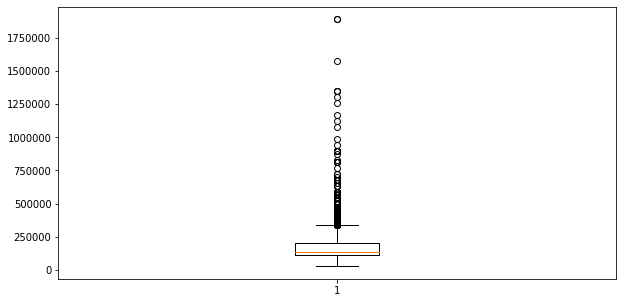

In [48]:
# Get the values in Box Plot after eliminating outliers from Income Amount
plt.figure(figsize=(10,5))
plt.boxplot(df_a1['AMT_INCOME_TOTAL'])
plt.show()

Removing the outlier and now this variable can be used in our analysis

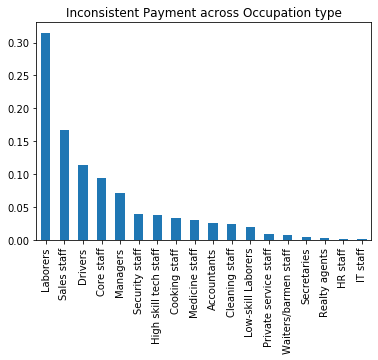

In [49]:
# Plot the graph of Occupation type
df_a1[~(df_a1['OCCUPATION_TYPE'].isnull())]['OCCUPATION_TYPE'].value_counts(normalize=True).plot.bar()
plt.title('Inconsistent Payment across Occupation type')

plt.show()

Count of Labour is quite high in the customers who has most payment inconsistencies followed by Sales staff and Drivers.

In [50]:
df_a1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24823 entries, 0 to 307509
Data columns (total 25 columns):
SK_ID_CURR                  24823 non-null int64
TARGET                      24823 non-null int64
NAME_CONTRACT_TYPE          24823 non-null object
CODE_GENDER                 24823 non-null object
FLAG_OWN_CAR                24823 non-null object
FLAG_OWN_REALTY             24823 non-null object
CNT_CHILDREN                24823 non-null int64
AMT_INCOME_TOTAL            24823 non-null float64
AMT_CREDIT                  24823 non-null float64
AMT_ANNUITY                 24823 non-null float64
AMT_GOODS_PRICE             24802 non-null float64
NAME_INCOME_TYPE            24823 non-null object
NAME_EDUCATION_TYPE         24823 non-null object
NAME_FAMILY_STATUS          24823 non-null object
NAME_HOUSING_TYPE           24823 non-null object
DAYS_BIRTH                  24823 non-null int64
DAYS_EMPLOYED               24823 non-null int64
OCCUPATION_TYPE             18545 non-nul

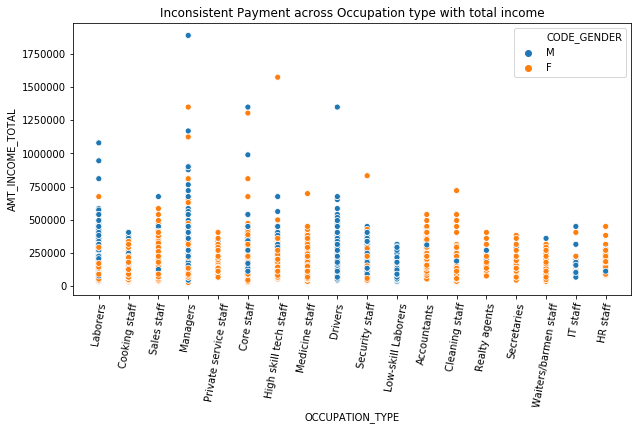

In [51]:
# Check the scatter plot for any further unusual high values of Income amount.
plt.figure(figsize=(10,5))
sns.scatterplot(data = df_a1, x = 'OCCUPATION_TYPE', y = 'AMT_INCOME_TOTAL', hue='CODE_GENDER')
plt.title('Inconsistent Payment across Occupation type with total income')
plt.xticks(rotation = 80)

plt.show()

Managers with inconsistent payment have some high Income values which is not unusual, since they have higher educational degree to support that.
Female employees has relatively high inconsistent payment whose income is below 500000. .

In [52]:
# Create a range of values for Total Income
bins = [0,300000,600000,900000,1200000,1500000,1800000,2100000,2400000,2700000,3000000,3300000]
ranges = ['0-300000', '300000-600000','600000-900000', '900000-1200000', '1200000-1500000', '1500000-1800000','1800000-2100000','2100000-2400000','2400000-2700000','2700000-3000000','3000000 and above']
df_a1['AMT_INCOME_TOTAL_RANGE']=pd.cut(df_a1['AMT_INCOME_TOTAL'],bins=bins,labels=ranges)

In [53]:
# Get the count of values of Total Income
df_a1['AMT_INCOME_TOTAL_RANGE'].value_counts()

0-300000             23472
300000-600000         1276
600000-900000           62
1200000-1500000          5
900000-1200000           5
1800000-2100000          2
1500000-1800000          1
3000000 and above        0
2700000-3000000          0
2400000-2700000          0
2100000-2400000          0
Name: AMT_INCOME_TOTAL_RANGE, dtype: int64

In [54]:
# Derive the column age from the existing column Days Birth by removing the negative values.
df_a1['age'] = abs(df_a1['DAYS_BIRTH']/365).astype('int')

In [55]:
# Derive the column Employment_Duration_in_Yrs from the existing column Days Employed by removing the negative values.
df_a1['Employment_Duration_in_Yrs'] = abs(df_a1['DAYS_EMPLOYED']/365).astype('int')

In [56]:
# Remove the columns Days Birth and Days Employed
del df_a1['DAYS_BIRTH']
del df_a1['DAYS_EMPLOYED']

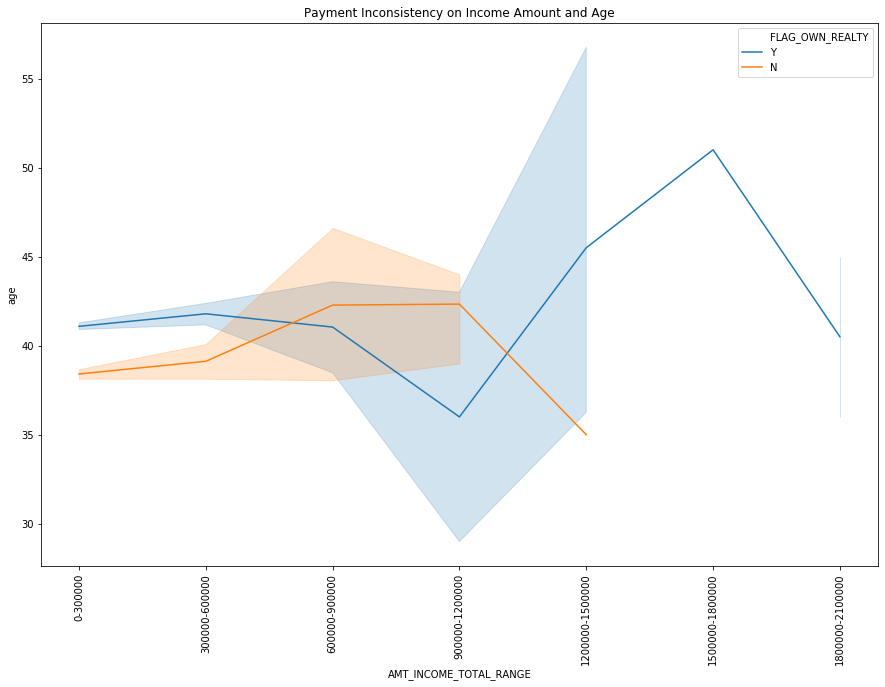

In [57]:
#Plot a graph of payment Inconsistencies on Total Income and age with Realty status
plt.figure(figsize=(15,10))
sns.lineplot(df_a1['AMT_INCOME_TOTAL_RANGE'],df_a1['age'], hue=df_a1['FLAG_OWN_REALTY'])
plt.title("Payment Inconsistency on Income Amount and Age")
plt.xticks(rotation=90)
plt.show()

Here, Below are the observations for customers who have paid EMIs with inconsistencies:
1. Payment inconsistencies can be seen in Customers who has higher income bracket and higher age and who owns any realty.
2. Customers who don't own any realty and have higher income bracket don't have any inconsistency. I other words, there are no customers with inconsistencies who don't have any realty and also lies in higher income bracket.

In [58]:
df_a1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24823 entries, 0 to 307509
Data columns (total 26 columns):
SK_ID_CURR                    24823 non-null int64
TARGET                        24823 non-null int64
NAME_CONTRACT_TYPE            24823 non-null object
CODE_GENDER                   24823 non-null object
FLAG_OWN_CAR                  24823 non-null object
FLAG_OWN_REALTY               24823 non-null object
CNT_CHILDREN                  24823 non-null int64
AMT_INCOME_TOTAL              24823 non-null float64
AMT_CREDIT                    24823 non-null float64
AMT_ANNUITY                   24823 non-null float64
AMT_GOODS_PRICE               24802 non-null float64
NAME_INCOME_TYPE              24823 non-null object
NAME_EDUCATION_TYPE           24823 non-null object
NAME_FAMILY_STATUS            24823 non-null object
NAME_HOUSING_TYPE             24823 non-null object
OCCUPATION_TYPE               18545 non-null object
CNT_FAM_MEMBERS               24823 non-null float64
ORGA

In [59]:
# Get the counts of Organization type
df_a1['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    6322
Self-employed             3908
XNA                       2990
Other                     1275
Business Entity Type 2     900
Construction               785
Trade: type 7              740
Medicine                   737
Government                 725
School                     526
Transport: type 4          501
Business Entity Type 1     487
Kindergarten               484
Trade: type 3              361
Industry: type 3           348
Security                   324
Agriculture                257
Housing                    235
Industry: type 11          234
Industry: type 9           225
Restaurant                 212
Transport: type 3          187
Postal                     182
Transport: type 2          172
Military                   135
Trade: type 2              133
Bank                       130
Police                     117
Industry: type 1           115
Industry: type 7           105
Services                   104
Security Ministries         96
Industry

In [60]:
#Replace the XNA with nan
df_a1[['ORGANIZATION_TYPE']]=df_a1[['ORGANIZATION_TYPE']].replace('XNA',np.nan)

In [61]:
# Remove the null values of Organization Type from dataset
df_a1 = df_a1[~(df_a1['ORGANIZATION_TYPE'].isnull())]

In [62]:
#Remove the null values from Observation field
df_a1 = df_a1[~df_a1['OBS_30_CNT_SOCIAL_CIRCLE'].isna()]

In [63]:
# Analyze the Goods Price 
df_a1['AMT_GOODS_PRICE'].describe()

count    2.178500e+04
mean     4.886578e+05
std      3.108441e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.750000e+05
max      3.600000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [299]:
df_a1[df_a1['AMT_GOODS_PRICE'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_CREDIT_RANGE,AMT_INCOME_TOTAL_RANGE,age,Employment_Duration_in_Yrs
7880,109190,1,Revolving loans,F,N,N,0,121500.0,270000.0,13500.0,NaN,Working,Higher education,Single / not married,With parents,Managers,1.0,Business Entity Type 3,2.0,0.0,1.0,0.0,0-500000,0-300000,33,1
41099,147593,1,Revolving loans,F,N,N,0,58500.0,202500.0,10125.0,NaN,Working,Secondary / secondary special,Married,Rented apartment,Sales staff,2.0,Self-employed,0.0,0.0,0.0,0.0,0-500000,0-300000,41,1
50540,158525,1,Revolving loans,F,N,Y,0,90000.0,270000.0,13500.0,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,2.0,Business Entity Type 3,6.0,2.0,5.0,1.0,0-500000,0-300000,22,0
56002,164897,1,Revolving loans,F,N,Y,0,180000.0,855000.0,42750.0,NaN,Commercial associate,Higher education,Married,House / apartment,Sales staff,2.0,Self-employed,0.0,0.0,0.0,0.0,500000-1000000,0-300000,55,6
69461,180561,1,Revolving loans,F,N,Y,1,103500.0,180000.0,9000.0,NaN,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,2.0,Self-employed,7.0,0.0,7.0,0.0,0-500000,0-300000,27,3
78786,191335,1,Revolving loans,F,N,Y,2,67500.0,202500.0,10125.0,NaN,Working,Secondary / secondary special,Married,House / apartment,Core staff,4.0,Postal,1.0,0.0,1.0,0.0,0-500000,0-300000,44,2
86000,199789,1,Revolving loans,F,N,Y,0,40500.0,135000.0,6750.0,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,2.0,Housing,0.0,0.0,0.0,0.0,0-500000,0-300000,49,4
86005,199794,1,Revolving loans,F,N,Y,0,112500.0,247500.0,12375.0,NaN,Working,Secondary / secondary special,Married,House / apartment,Laborers,2.0,Business Entity Type 3,0.0,0.0,0.0,0.0,0-500000,0-300000,49,8
124770,244697,1,Revolving loans,F,N,Y,1,103500.0,135000.0,6750.0,NaN,State servant,Secondary / secondary special,Married,House / apartment,Core staff,3.0,Agriculture,0.0,0.0,0.0,0.0,0-500000,0-300000,44,1
152898,277210,1,Revolving loans,F,N,Y,0,225000.0,315000.0,15750.0,NaN,Working,Secondary / secondary special,Single / not married,Office apartment,Laborers,1.0,Self-employed,0.0,0.0,0.0,0.0,0-500000,0-300000,58,12


In [300]:
df_a1.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                      0
AMT_GOODS_PRICE                 19
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
OCCUPATION_TYPE               3283
CNT_FAM_MEMBERS                  0
ORGANIZATION_TYPE                0
OBS_30_CNT_SOCIAL_CIRCLE         0
DEF_30_CNT_SOCIAL_CIRCLE         0
OBS_60_CNT_SOCIAL_CIRCLE         0
DEF_60_CNT_SOCIAL_CIRCLE         0
AMT_CREDIT_RANGE                 0
AMT_INCOME_TOTAL_RANGE           0
age                              0
Employment_Duration_in_Yrs       0
dtype: int64

In [64]:
#Remove the null values from Goods Price
df_a1 = df_a1[~df_a1['AMT_GOODS_PRICE'].isnull()]

In [65]:
#Get the quantile values of Goods Price
df_a1['AMT_GOODS_PRICE'].quantile([0.5,0.7,0.9,0.95,0.99,1.0])

0.50     450000.0
0.70     585000.0
0.90     900000.0
0.95    1125000.0
0.99    1575000.0
1.00    3600000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [66]:
# Get the count of dependents
df_a1['CNT_FAM_MEMBERS'].value_counts()

2.0     10169
1.0      4611
3.0      4513
4.0      2100
5.0       324
6.0        53
7.0         6
8.0         6
11.0        1
10.0        1
13.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

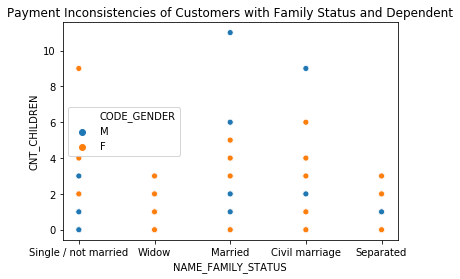

In [67]:
# Plot the graph of Payments Inconsistencies of customers with Family Status and Dependent for Male and Female
sns.scatterplot(df_a1.NAME_FAMILY_STATUS,df_a1.CNT_CHILDREN, hue=df_a1['CODE_GENDER'])
plt.xlabel('NAME_FAMILY_STATUS')
plt.ylabel('CNT_CHILDREN')
plt.title('Payment Inconsistencies of Customers with Family Status and Dependent')
plt.show()

It can be observed from the graph that, customers which have payment inconsistencies, are mostly married and have more dependents.
Female customers who are widow tends to have inconsistent payment in their loan EMIs.
Higher number of children/dependents are facing issue with paying the EMIs on time and therefore have higher inconsistencies in female customers.

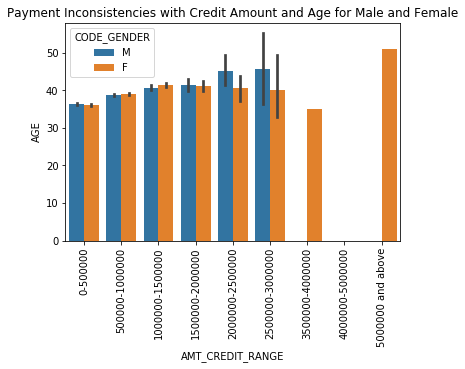

In [68]:
# Plot the graph of Credit Amount for age for male and female
sns.barplot(df_a1.AMT_CREDIT_RANGE,df_a1.age, hue=df_a1['CODE_GENDER'])
plt.xlabel('AMT_CREDIT_RANGE')
plt.ylabel('AGE')
plt.title('Payment Inconsistencies with Credit Amount and Age for Male and Female')
plt.xticks(rotation=90)
plt.show()

As per the above graph, the payment inconsistencies can be seen higher in older male customers for credit ranges from 15 lakhs to 30 lakhs.
There is no male customer who has payment issues with income above 30lakhs.
Payment inconsistencies in very few female customer, above 40 age and highest credit range, is quite higher in comparison to other credit bracket and age group of females.

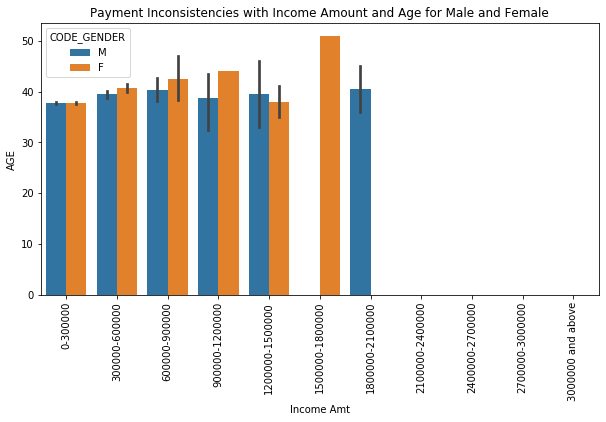

In [69]:
#plot the graph payment inconsistencies of total Income and age for male and female
plt.figure(figsize=(10,5))
sns.barplot(df_a1.AMT_INCOME_TOTAL_RANGE,df_a1.age, hue=df_a1['CODE_GENDER'])
plt.xlabel('Income Amt')
plt.xticks(rotation=90)
plt.ylabel('AGE')
plt.title('Payment Inconsistencies with Income Amount and Age for Male and Female')
plt.show()

As per the above graph, the payment inconsistencies can be seen higher in older female customers for income ranges from 15 lakhs to 21 lakhs.
There is no customer with payment issues with income above 21lakhs.
Payment inconsistencies in very few female customer, above 50 age and higher income range, is quite higher in comparison to other income bracket and age group of females.
Payment inconsistencies is similar in all income brackets from male.

In [70]:
# Get the count of Credit range for inconsistent payment
df_a1['AMT_CREDIT_RANGE'].value_counts()

0-500000             11067
500000-1000000        8117
1000000-1500000       2193
1500000-2000000        345
2000000-2500000         49
2500000-3000000         12
5000000 and above        1
3500000-4000000          1
4000000-5000000          0
Name: AMT_CREDIT_RANGE, dtype: int64

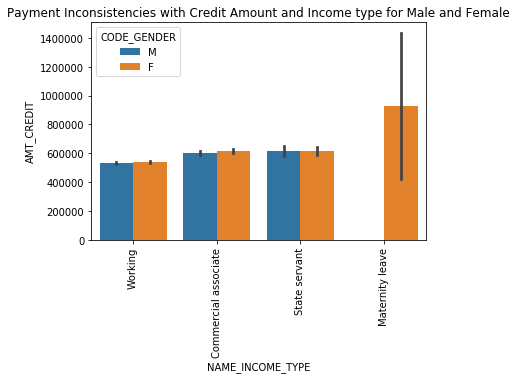

In [71]:
# Plot the graph for payment inconsistencies on Credit amount and Income Type for male and female
sns.barplot(df_a1['NAME_INCOME_TYPE'],df_a1['AMT_CREDIT'], hue=df_a1["CODE_GENDER"])
plt.xlabel('NAME_INCOME_TYPE')
plt.xticks(rotation=90)
plt.ylabel('AMT_CREDIT')
plt.title('Payment Inconsistencies with Credit Amount and Income type for Male and Female')
plt.show()

Customer on Maternity leave have higher Credit taken which is not a good sign. Lets check the income once.

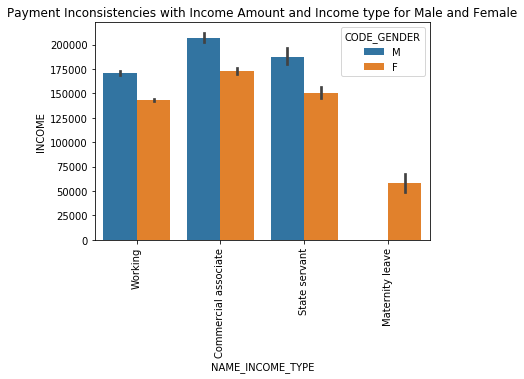

In [72]:
# Plot the graph for Payment Inconsistencies on Income Amount and Income Type
sns.barplot(df_a1['NAME_INCOME_TYPE'],df_a1['AMT_INCOME_TOTAL'], hue=df_a1["CODE_GENDER"])
plt.xlabel('NAME_INCOME_TYPE')
plt.xticks(rotation=90)
plt.ylabel('INCOME')
plt.title('Payment Inconsistencies with Income Amount and Income type for Male and Female')
plt.show()

Among the Inconsistent payment customers, Coomercial Associate Income type Male customers is leading.
Female in Maternity leave have lower income and so there might be inconsistencies in payments.

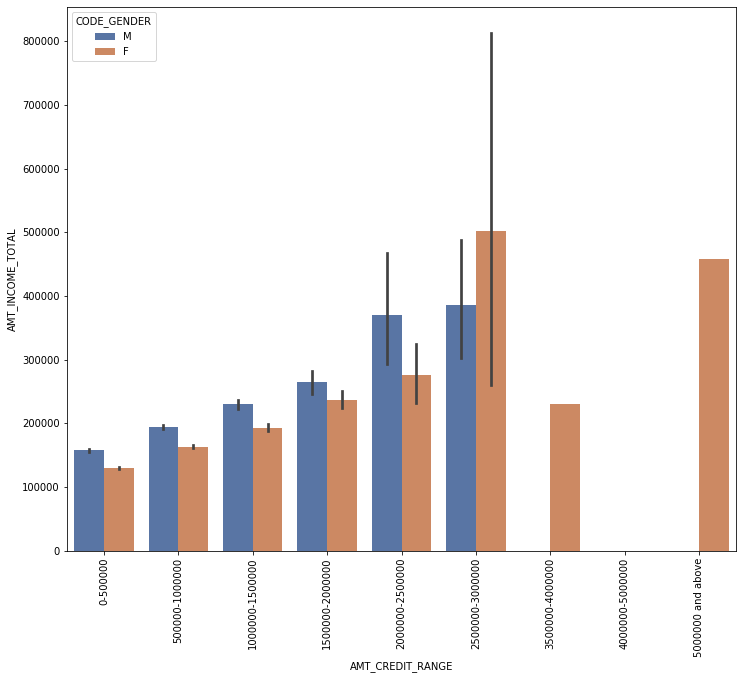

In [73]:
# Plot the graph for payment inconsistencies on Credit amount and Total Income for Male and Female
plt.figure(figsize=(12,10))

sns.barplot(data=df_a1, x=df_a1['AMT_CREDIT_RANGE'], y=df_a1['AMT_INCOME_TOTAL'], hue="CODE_GENDER",palette="deep")
plt.xticks(rotation=90)
plt.show()

Payment Inconsistency can be seen the customers who take high credit despite of having higher income. However, there are no customers with can be seen with Inconsistent payment for credit range 40 lakh to 50 lakh.
There are no male customers with Inconsistent payment above 30 lakhs of Credit.

### Analysis for Customers with No payment issues in dataset(Target=0)

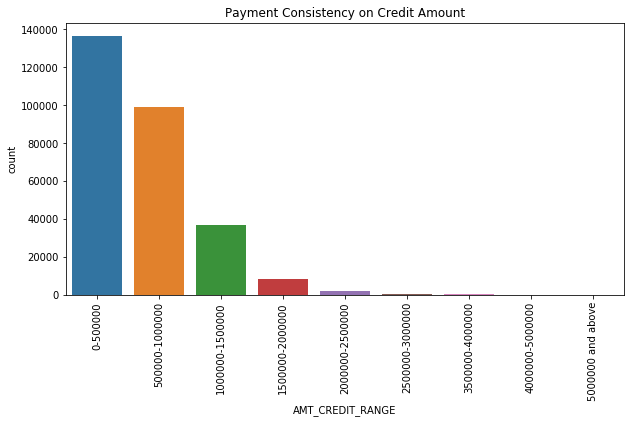

In [74]:
#Plot the graph for payment consistencies on Credit Amount For Target=0

plt.figure(figsize=(10,5))
sns.countplot(df_a0['AMT_CREDIT_RANGE'])
plt.title("Payment Consistency on Credit Amount")
plt.xticks(rotation=90)
plt.show()

We can see that good payment consitencies found in those who have recieved credit amount less than 10 lakhs. Perhaps that might be due to higher number of people who opted for loan amount less than 10 lakhs.


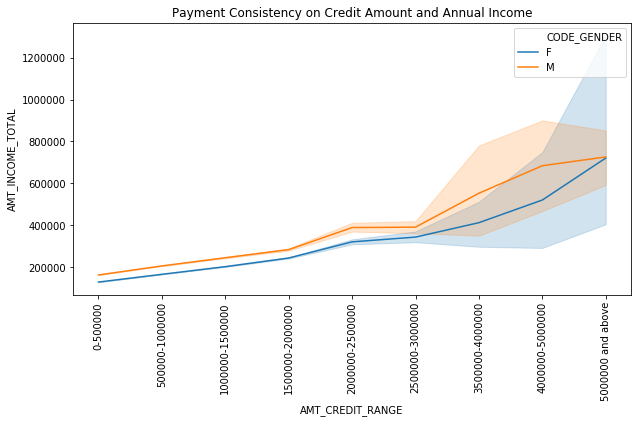

In [75]:
# Plot the graph for payment consistencies on Credit amount and Total Income for male and female
plt.figure(figsize=(10,5))
sns.lineplot(df_a0['AMT_CREDIT_RANGE'],df_a0['AMT_INCOME_TOTAL'], hue=df_a0['CODE_GENDER'])
plt.title("Payment Consistency on Credit Amount and Annual Income")
plt.xticks(rotation=90)
plt.show()


As per the graph obtained above on the relation of Amount Credit vs Income in Consistent payment dataset- Payment Consistency can be seen in the customers with Amount Credit which is quite high for the Total Income of the customer and this trend increases with the increase in income. 
Therefor, it shows a good indicator that with the increase in Income, even if the Credit amount increases the customers are consistent with their payments.

In [76]:
#Get the values of AMT_INCOME_TOTAL in quantile variations
df_a0['AMT_INCOME_TOTAL'].quantile([0.5,0.7,0.9,0.95,0.99,1.0])


0.50      148500.0
0.70      185400.0
0.90      270000.0
0.95      337500.0
0.99      486000.0
1.00    18000090.0
Name: AMT_INCOME_TOTAL, dtype: float64


##### There is some high values in AMT_INCOME_TOTAL, lets check the Box-Plot


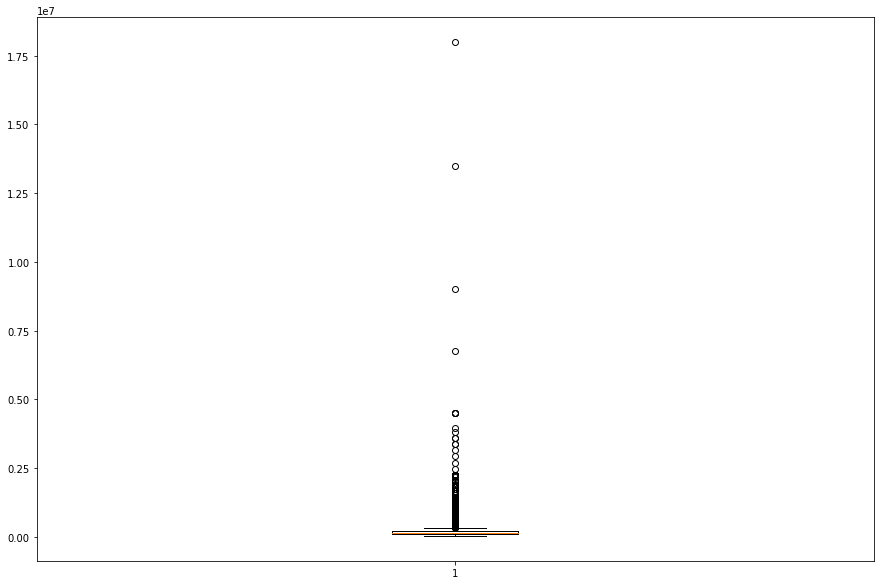

In [77]:
# Plot the graph for payment consistencies on Total Income
plt.figure(figsize=(15,10))
plt.boxplot(df_a0['AMT_INCOME_TOTAL'])
plt.show()


Now it is clear the there is an outlier in this variable, lets check which occupation has such values.


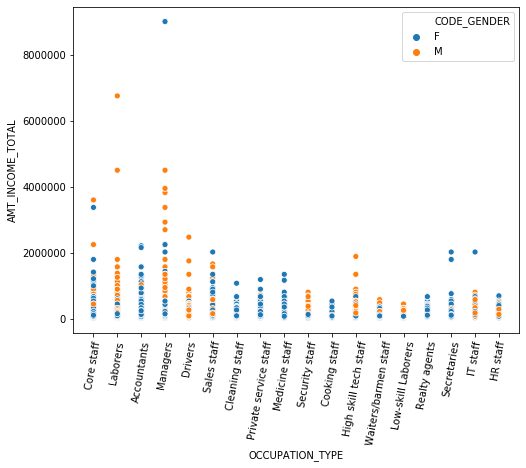

In [78]:

# Get the AMT_INCOME_TOTAL graph against the OCCUPATION_TYPE, to check amount based on Occupation Type.
plt.figure(figsize=(8,6))
sns.scatterplot(data = df_a0, x = 'OCCUPATION_TYPE', y = 'AMT_INCOME_TOTAL',hue = 'CODE_GENDER')
plt.xticks(rotation = 80)

plt.show()


As per the graph above, the value of AMT_INCOME_TOTAL is unusally high, so lets check how many outliers are there for amount>3000000.

In [79]:
#Get the records with Income higher than 3000000.
df_a0[(df_a0['AMT_INCOME_TOTAL']>3000000)]


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_CREDIT_RANGE
20216,123587,0,Cash loans,M,Y,N,0,3825000.0,1241023.5,117369.0,1206000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-18456,-1095,Managers,2.0,Business Entity Type 3,1.0,0.0,1.0,0.0,1000000-1500000
49645,157471,0,Cash loans,F,Y,N,0,3600000.0,953460.0,68791.5,900000.0,Commercial associate,Higher education,Married,House / apartment,-9988,-865,NaN,2.0,Business Entity Type 3,0.0,0.0,0.0,0.0,500000-1000000
77768,190160,0,Cash loans,F,Y,N,0,9000000.0,1431531.0,132601.5,1377000.0,Working,Higher education,Civil marriage,House / apartment,-16425,-8476,Managers,2.0,Business Entity Type 1,1.0,0.0,1.0,0.0,1000000-1500000
82846,196091,0,Cash loans,F,N,Y,1,3375000.0,900000.0,40801.5,900000.0,Working,Higher education,Married,House / apartment,-14018,-1895,Core staff,3.0,Business Entity Type 1,0.0,0.0,0.0,0.0,500000-1000000
86026,199821,0,Cash loans,M,Y,Y,1,3375000.0,900000.0,46084.5,900000.0,Working,Higher education,Married,House / apartment,-12516,-474,Managers,3.0,Business Entity Type 3,2.0,1.0,2.0,1.0,500000-1000000
101007,217276,0,Revolving loans,M,Y,Y,0,3150000.0,2250000.0,225000.0,2250000.0,Commercial associate,Higher education,Married,House / apartment,-13386,-5564,NaN,2.0,Trade: type 2,0.0,0.0,0.0,0.0,2000000-2500000
103006,219563,0,Revolving loans,M,Y,Y,0,4500000.0,2250000.0,225000.0,2250000.0,Working,Higher education,Single / not married,House / apartment,-10778,-378,Managers,1.0,Construction,1.0,0.0,1.0,0.0,2000000-2500000
131127,252084,0,Cash loans,M,Y,N,0,6750000.0,790830.0,52978.5,675000.0,Working,Higher education,Married,House / apartment,-19341,-443,Laborers,2.0,Transport: type 4,0.0,0.0,0.0,0.0,500000-1000000
181698,310601,0,Cash loans,M,Y,Y,1,3950059.5,675000.0,66217.5,675000.0,Commercial associate,Higher education,Married,With parents,-10572,-3163,Managers,3.0,Trade: type 2,4.0,0.0,4.0,0.0,500000-1000000
187833,317748,0,Cash loans,M,N,N,0,4500000.0,835380.0,42651.0,675000.0,Working,Secondary / secondary special,Married,House / apartment,-18715,-3331,Laborers,2.0,Construction,0.0,0.0,0.0,0.0,500000-1000000


In [80]:
#Eliminate the outliers in Income identified above.
df_a1 = df_a1[~((df_a1['AMT_INCOME_TOTAL']>3000000))]


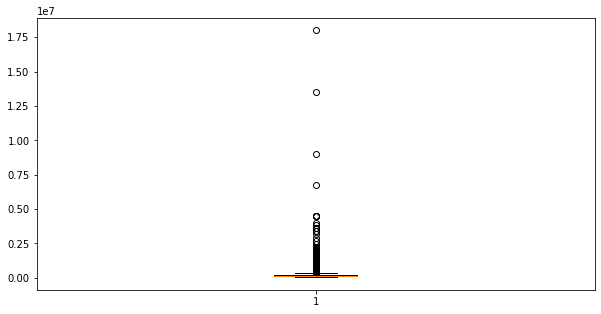

In [81]:

# Get the values in Box Plot after eliminating outliers from Income Amount
plt.figure(figsize=(10,5))
plt.boxplot(df_a0['AMT_INCOME_TOTAL'])
plt.show()

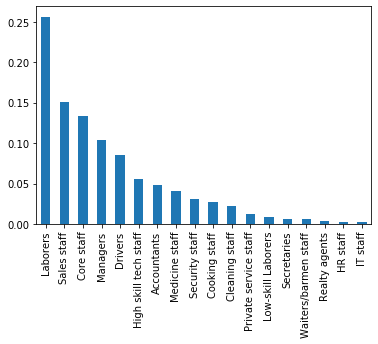

In [82]:
#Get the value counts of categories in Occupation Type

df_a0[~(df_a0['OCCUPATION_TYPE'].isnull())]['OCCUPATION_TYPE'].value_counts(normalize=True).plot.bar()
plt.show()



Count of Labour is quite high in the customers who has most payment Consistencies followed by Sales staff and Drivers.


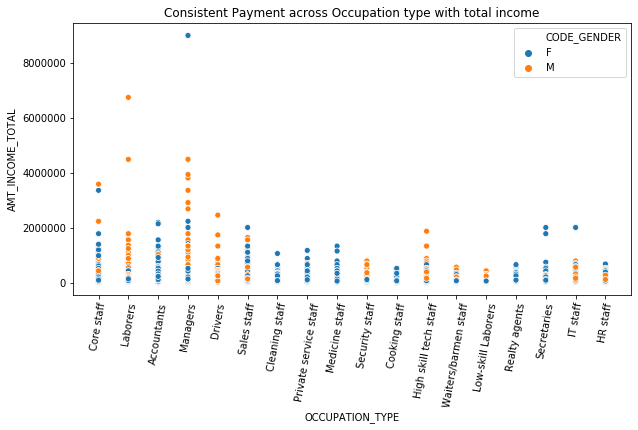

In [83]:

# Check the scatter plot for any further unusual high values of Income amount.
plt.figure(figsize=(10,5))
sns.scatterplot(data = df_a0, x = 'OCCUPATION_TYPE', y = 'AMT_INCOME_TOTAL', hue='CODE_GENDER')
plt.title('Consistent Payment across Occupation type with total income')
plt.xticks(rotation = 80)

plt.show()


Managers with consistent payment have some high Income values which is not unusual, since they have higher educational degree to support that.
Female mnagers have relatively high consistent payment and higher salaries.


In [84]:
# Create the range of Total Income
bins = [0,300000,600000,900000,1200000,1500000,1800000,2100000,2400000,2700000,3000000,3300000]
ranges = ['0-300000', '300000-600000','600000-900000', '900000-1200000', '1200000-1500000', '1500000-1800000','1800000-2100000','2100000-2400000','2400000-2700000','2700000-3000000','3000000 and above']
df_a0['AMT_INCOME_TOTAL_RANGE']=pd.cut(df_a0['AMT_INCOME_TOTAL'],bins=bins,labels=ranges)


In [85]:
# Get the count of values in Total Income range
df_a0['AMT_INCOME_TOTAL_RANGE'].value_counts()

0-300000             261296
300000-600000         19856
600000-900000          1267
900000-1200000          115
1200000-1500000          69
1500000-1800000          34
2100000-2400000          15
1800000-2100000          12
2400000-2700000           2
3000000 and above         1
2700000-3000000           1
Name: AMT_INCOME_TOTAL_RANGE, dtype: int64

In [86]:
# Create the fields age and Employment duration from days birth and days employed
df_a0['age'] = abs(df_a0['DAYS_BIRTH']/365).astype('int')

df_a0['Employment_Duration_in_Yrs'] = abs(df_a0['DAYS_EMPLOYED']/365).astype('int')


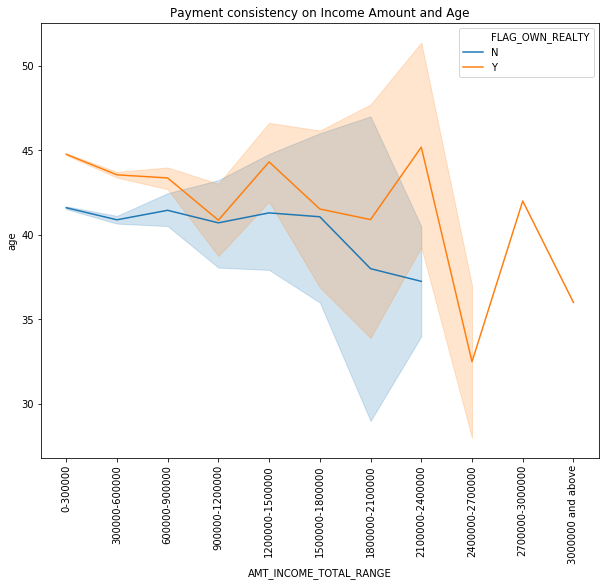

In [87]:
# Plot the graph of total income range and age with Realty status for customers with payment consistencies
plt.figure(figsize=(10,8))
sns.lineplot(df_a0['AMT_INCOME_TOTAL_RANGE'],df_a0['age'], hue=df_a0['FLAG_OWN_REALTY'])
plt.title("Payment consistency on Income Amount and Age")
plt.xticks(rotation=90)
plt.show()



Here, Below are the observations for customers who have paid EMIs with consistencies:
1. Payment consistencies can be seen in Customers who has higher income bracket and lower age relatively and who owns any realty.
2. There is a trend in which customers have consistent payment where younger customers have higher Income and who don't owns any realty.

In [88]:
# get the count of Organizaion Type
df_a0['ORGANIZATION_TYPE'].value_counts()


Business Entity Type 3    61669
XNA                       52384
Self-employed             34504
Other                     15408
Medicine                  10455
Government                 9678
Business Entity Type 2     9653
School                     8367
Trade: type 7              7091
Kindergarten               6395
Construction               5936
Business Entity Type 1     5496
Transport: type 4          4897
Industry: type 9           3143
Trade: type 3              3131
Industry: type 3           2929
Security                   2923
Housing                    2723
Military                   2499
Industry: type 11          2470
Bank                       2377
Police                     2224
Agriculture                2197
Transport: type 2          2032
Postal                     1975
Security Ministries        1878
Trade: type 2              1767
Restaurant                 1599
Services                   1471
University                 1262
Industry: type 7           1202
Transpor

In [89]:
#Replace the XAN value with nan
df_a0[['ORGANIZATION_TYPE']]=df_a0[['ORGANIZATION_TYPE']].replace('XNA',np.nan)


In [90]:
#Eliminate the null values from Organization Type
df_a0 = df_a0[~(df_a0['ORGANIZATION_TYPE'].isnull())]


In [91]:
#Eliminate the null value from OBS_30_CNT_SOCIAL_CIRCLE
df_a0 = df_a0[~df_a0['OBS_30_CNT_SOCIAL_CIRCLE'].isna()]


In [92]:
#Get the null value records in AMT_GOODS_PRICE
df_a0[df_a0['AMT_GOODS_PRICE'].isnull()]


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_CREDIT_RANGE,AMT_INCOME_TOTAL_RANGE,age,Employment_Duration_in_Yrs
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,-10072,-381,Core staff,4.0,Kindergarten,2.0,1.0,2.0,1.0,0-500000,0-300000,27,1
5937,106955,0,Revolving loans,F,N,N,0,157500.0,450000.0,22500.0,NaN,Working,Secondary / secondary special,Married,House / apartment,-11993,-2921,Private service staff,2.0,Business Entity Type 3,0.0,0.0,0.0,0.0,0-500000,0-300000,32,8
6425,107494,0,Revolving loans,F,N,N,0,67500.0,202500.0,10125.0,NaN,Working,Higher education,Married,House / apartment,-9727,-2712,Accountants,2.0,Trade: type 7,1.0,1.0,1.0,0.0,0-500000,0-300000,26,7
6703,107822,0,Revolving loans,F,N,N,1,121500.0,180000.0,9000.0,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,-11079,-899,Managers,3.0,Government,1.0,0.0,1.0,0.0,0-500000,0-300000,30,2
7647,108913,0,Revolving loans,M,N,Y,0,180000.0,450000.0,22500.0,NaN,Working,Higher education,Single / not married,House / apartment,-9986,-1847,Security staff,1.0,Construction,1.0,0.0,1.0,0.0,0-500000,0-300000,27,5
7995,109322,0,Revolving loans,M,N,Y,0,112500.0,180000.0,9000.0,NaN,Working,Secondary / secondary special,Single / not married,House / apartment,-12420,-1610,Security staff,1.0,Security,3.0,0.0,3.0,0.0,0-500000,0-300000,34,4
10819,112595,0,Revolving loans,F,N,Y,0,90000.0,270000.0,13500.0,NaN,Working,Secondary / secondary special,Married,House / apartment,-18193,-242,NaN,2.0,Transport: type 4,0.0,0.0,0.0,0.0,0-500000,0-300000,49,0
11287,113148,0,Revolving loans,F,N,Y,4,225000.0,135000.0,6750.0,NaN,State servant,Secondary / secondary special,Single / not married,House / apartment,-17610,-4662,Laborers,5.0,School,3.0,0.0,3.0,0.0,0-500000,0-300000,48,12
13008,115162,0,Revolving loans,F,N,Y,1,157500.0,450000.0,22500.0,NaN,State servant,Higher education,Married,House / apartment,-14005,-1404,Laborers,3.0,Housing,1.0,1.0,1.0,1.0,0-500000,0-300000,38,3
14699,117150,0,Revolving loans,M,N,N,1,135000.0,270000.0,13500.0,NaN,Working,Secondary / secondary special,Married,House / apartment,-9962,-1676,Drivers,3.0,Military,6.0,0.0,6.0,0.0,0-500000,0-300000,27,4


In [93]:
#Get the null value counts in dataset after removing null records
df_a0.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                 237
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
OCCUPATION_TYPE               37581
CNT_FAM_MEMBERS                   2
ORGANIZATION_TYPE                 0
OBS_30_CNT_SOCIAL_CIRCLE          0
DEF_30_CNT_SOCIAL_CIRCLE          0
OBS_60_CNT_SOCIAL_CIRCLE          0
DEF_60_CNT_SOCIAL_CIRCLE          0
AMT_CREDIT_RANGE                  0
AMT_INCOME_TOTAL_RANGE           14
age                               0
Employment_Duration_in_Yrs  

In [331]:
#Eliminate null value from AMT_GOODS_PRICE
df_a0 = df_a0[~df_a0['AMT_GOODS_PRICE'].isnull()]

In [332]:
#Get the quamtile of AMT_GOODS_PRICE
df_a0['AMT_GOODS_PRICE'].quantile([0.5,0.7,0.9,0.95,0.99,1.0])


0.50     450000.0
0.70     675000.0
0.90    1125000.0
0.95    1350000.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [94]:
# Get the count of family members
df_a0['CNT_FAM_MEMBERS'].value_counts()

2.0     112753
3.0      46798
1.0      44216
4.0      22181
5.0       3085
6.0        342
7.0         72
8.0         13
9.0          6
12.0         2
20.0         2
14.0         2
10.0         2
15.0         1
16.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

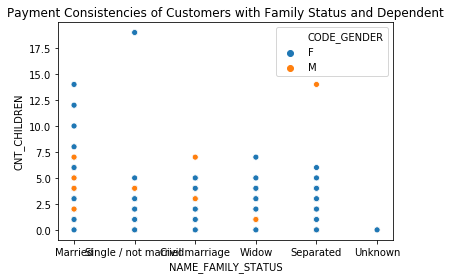

In [95]:
#Plot the graph of family status and dependent for male and female
sns.scatterplot(df_a0.NAME_FAMILY_STATUS,df_a0.CNT_CHILDREN, hue=df_a0['CODE_GENDER'])
plt.xlabel('NAME_FAMILY_STATUS')
plt.ylabel('CNT_CHILDREN')
plt.title('Payment Consistencies of Customers with Family Status and Dependent')
plt.show()


It can be observed from the graph that, customers which have payment consistencies, are mostly married and have less dependents.
Female customers who are widow tends to have consistent payment in their loan EMIs.
Higher number of children/dependents with single are good in paying the EMIs on time and therefore have higher consistencies in such customers.

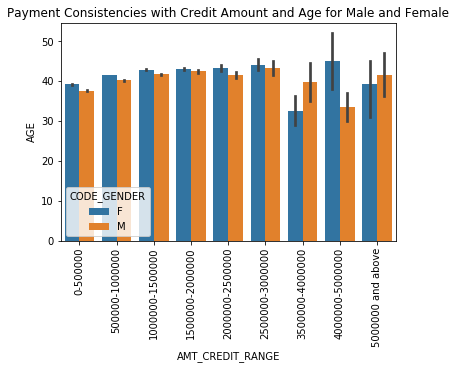

In [96]:
## Plot the graph for payment consistencies on Credit amount and age for male and female
sns.barplot(df_a0.AMT_CREDIT_RANGE,df_a0.age, hue=df_a0['CODE_GENDER'])
plt.xlabel('AMT_CREDIT_RANGE')
plt.ylabel('AGE')
plt.title('Payment Consistencies with Credit Amount and Age for Male and Female')
plt.xticks(rotation=90)
plt.show()


As per the above graph, the customer with payment consistencies can be seen throughout especially with the customer have lesser age and higher income.

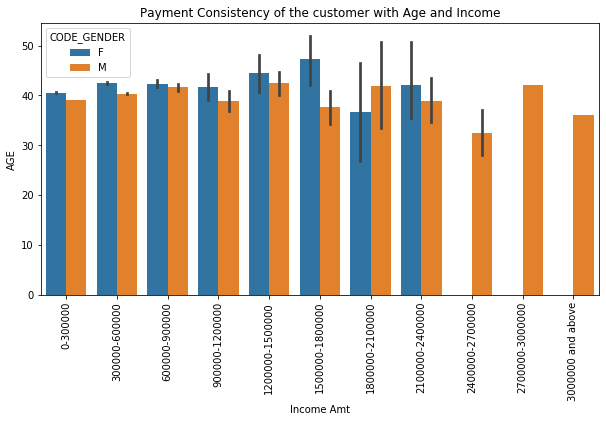

In [97]:
#Plot the graph for payment consistencies on age and Total Income for male and female
plt.figure(figsize=(10,5))
sns.barplot(df_a0.AMT_INCOME_TOTAL_RANGE,df_a0.age, hue=df_a0['CODE_GENDER'])
plt.xlabel('Income Amt')
plt.xticks(rotation=90)
plt.ylabel('AGE')
plt.title('Payment Consistency of the customer with Age and Income')
plt.show()

As per the above graph, the payment consistencies can be seen higher in younger female and older male customers for income ranges upto 24lakhs.
There is no male customer with consistent payment with income above 24lakhs.
Payment inconsistencies in very few female customer, above 50 age and higher income range, is quite higher in comparison to other income bracket and age group of females.


In [98]:
#Get the count of credit amount
df_a0['AMT_CREDIT_RANGE'].value_counts()

0-500000             108123
500000-1000000        80889
1000000-1500000       31631
1500000-2000000        7104
2000000-2500000        1408
2500000-3000000         294
3500000-4000000          16
5000000 and above         9
4000000-5000000           4
Name: AMT_CREDIT_RANGE, dtype: int64

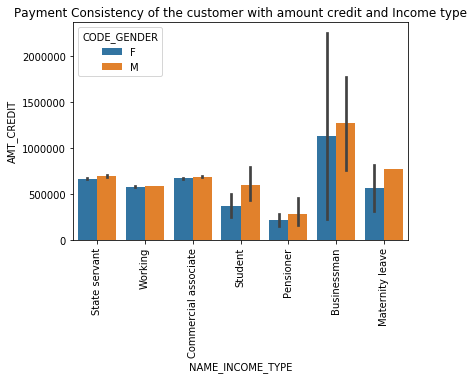

In [99]:
## Plot the graph for payment consistencies on Credit amount and Income Type for male and female
sns.barplot(df_a0['NAME_INCOME_TYPE'],df_a0['AMT_CREDIT'], hue=df_a0["CODE_GENDER"])
plt.xlabel('NAME_INCOME_TYPE')
plt.xticks(rotation=90)
plt.ylabel('AMT_CREDIT')
plt.title('Payment Consistency of the customer with amount credit and Income type')
plt.show()

Looks some erroneous data, Male can't have maternity leave. So this record needs to be removed first. Apart from that, Businessman have higher credit and very good payment record.
Pensioner have lower credit amount with consistent payment.

In [100]:
# Remove the data with male on maternity leave
df_a0 = df_a0[~((df_a0['NAME_INCOME_TYPE']=='Maternity leave') & (df_a0['CODE_GENDER']=='M'))]

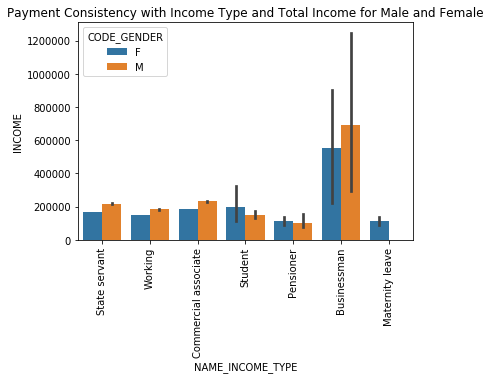

In [101]:
## Plot the graph for payment consistencies on Income Type and Total Income for male and female
sns.barplot(df_a0['NAME_INCOME_TYPE'],df_a0['AMT_INCOME_TOTAL'], hue=df_a0["CODE_GENDER"])
plt.xlabel('NAME_INCOME_TYPE')
plt.xticks(rotation=90)
plt.ylabel('INCOME')
plt.title('Payment Consistency with Income Type and Total Income for Male and Female')
plt.show()



Among the consistent payment customers, Businessman has the highest income and they are leading both for male and female.
Female in Maternity leave have lower income but still there is consistencies in payments.
Pensioner too have very low income but still have maintained good consistency in payments.


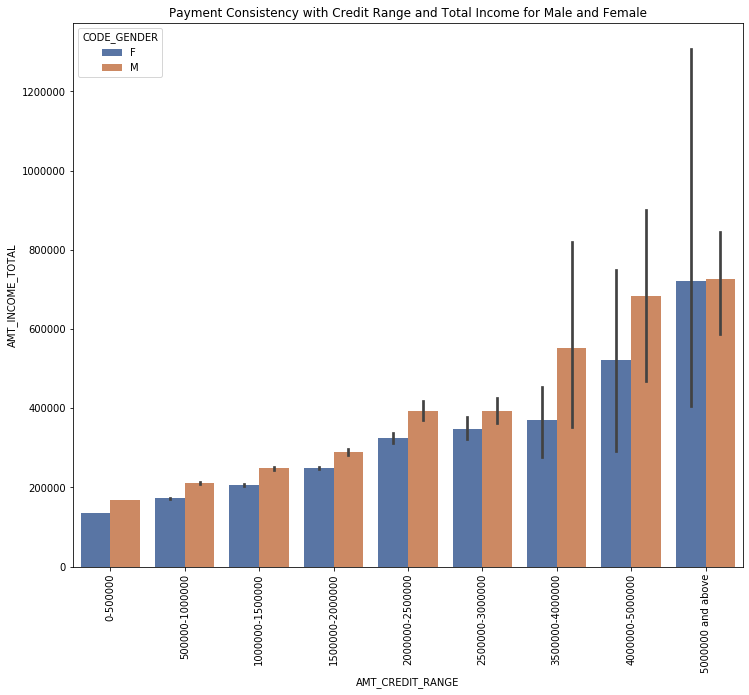

In [102]:
# Plot the graph for payment consistencies on Credit amount and Total Income for male and female
plt.figure(figsize=(12,10))

sns.barplot(data=df_a0, x=df_a0['AMT_CREDIT_RANGE'], y=df_a0['AMT_INCOME_TOTAL'], hue="CODE_GENDER",palette="deep")
plt.xticks(rotation=90)
plt.title('Payment Consistency with Credit Range and Total Income for Male and Female')
plt.show()


Payment consistency can be seen the customers who take high credit despite of having higher income. However, there are no customers with can be seen with Inconsistent payment for credit range 40 lakh to 50 lakh.
There are no male customers with Inconsistent payment above 30 lakhs of Credit.



In [103]:
# Read the previous application dataset
df_p = pd.read_csv("previous_application.csv")
df_p.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
#Check the percentage of null values in columns in this dataset
100*df_p.isnull().sum()/len(df_p)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [105]:
# Get the null value count of Down Payment Amount
df_p['AMT_DOWN_PAYMENT'].isnull().sum()

895844

In [345]:
# Get the null value count of Down Payment Amount
df_p['RATE_DOWN_PAYMENT'].isnull().sum()

895844

In [106]:
# Remove the fields with high null values and which is not required for analysis
del df_p['RATE_INTEREST_PRIMARY']
del df_p['RATE_INTEREST_PRIVILEGED']
del df_p['NAME_TYPE_SUITE']
del df_p['AMT_DOWN_PAYMENT']
del df_p['RATE_DOWN_PAYMENT']
del df_p['AMT_GOODS_PRICE']
del df_p['DAYS_DECISION']
del df_p['SELLERPLACE_AREA']
df_p.drop(df_p.loc[:,'DAYS_FIRST_DRAWING':'NFLAG_INSURED_ON_APPROVAL'].columns, axis= 1, inplace= True)
df_p.drop(df_p.loc[:,'WEEKDAY_APPR_PROCESS_START':'NFLAG_LAST_APPL_IN_DAY'].columns, axis= 1, inplace= True)

Text(0.5, 1.0, 'Amount Annuity for customers in previous application')

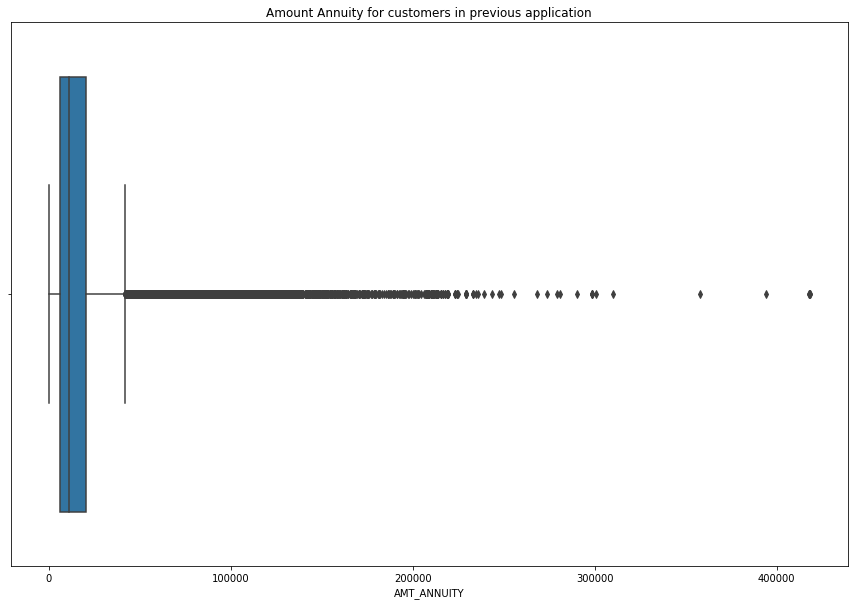

In [107]:
# Plot the graph for values in Amount Annuity
plt.figure(figsize=(15,10))

sns.boxplot(df_p['AMT_ANNUITY'])
plt.title('Amount Annuity for customers in previous application')

Looks some outliers in data above 300000 annuity, lets check the records first for such records.

In [108]:
#Check the records identified in above boxplot for values above 300000
df_p[(df_p['AMT_ANNUITY']>300000)]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
79406,1065968,406936,Cash loans,417927.645,2250000.0,2369070.0,Other,Refused,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,6.0,low_action,Cash Street: low
516560,2501351,238970,Cash loans,418058.145,2250000.0,2369070.0,Repairs,Refused,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,6.0,low_action,Cash Street: low
557857,1314599,327696,Cash loans,417927.645,2250000.0,2369070.0,Repairs,Refused,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,6.0,low_action,Cash Street: low
812131,1708234,263408,Consumer loans,357733.260,2205243.0,2012224.5,XAP,Refused,Cash through the bank,HC,Refreshed,Furniture,POS,XNA,Stone,Furniture,6.0,low_normal,POS industry with interest
911948,1225459,365299,Cash loans,418058.145,2250000.0,2369070.0,Repairs,Refused,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,6.0,low_action,Cash Street: low
1041292,1439030,291908,Consumer loans,393868.665,3066853.5,2176551.0,XAP,Approved,Cash through the bank,XAP,New,Furniture,POS,XNA,Stone,Furniture,6.0,low_normal,POS industry with interest
1079855,1845093,125165,Consumer loans,300425.445,1427553.0,1142041.5,XAP,Approved,Cash through the bank,XAP,New,Construction Materials,POS,XNA,Regional / Local,Construction,4.0,low_normal,POS industry with interest
1667858,1680534,409911,Cash loans,309942.000,900000.0,900000.0,XNA,Refused,Cash through the bank,HC,Refreshed,XNA,Cash,walk-in,Credit and cash offices,XNA,3.0,low_action,Cash Street: low


In [109]:
#Get the null records count in Amount Annuity
len(df_p[df_p['AMT_ANNUITY'].isnull()])

372235

In [111]:
# Get the Amount Annuity quantile values
df_p['AMT_ANNUITY'].quantile([0.5,0.7,0.9,0.95,0.99,1.0])

0.50     11250.0000
0.70     17783.1270
0.90     34703.8200
0.95     45336.7800
0.99     69685.7886
1.00    418058.1450
Name: AMT_ANNUITY, dtype: float64

In [112]:
# Remove the null records of Credit Amount from the dataset. 
df_p = df_p[~df_p['AMT_CREDIT'].isnull()]

In [113]:
# Get the count of null values in dataset previous application
df_p.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY               372235
AMT_APPLICATION                0
AMT_CREDIT                     0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT               372230
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION          346
dtype: int64

In [114]:
#Get the values counts in Name Cash Loan Purpose
df_p['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 922660
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [115]:
#Replace XAP value with value 'Not Applicable'
df_p[['NAME_CASH_LOAN_PURPOSE']] = df_p[['NAME_CASH_LOAN_PURPOSE']].replace('XAP', np.nan)

In [116]:
#Replace XNA value with NaN
df_p[['NAME_CASH_LOAN_PURPOSE']] = df_p[['NAME_CASH_LOAN_PURPOSE']].replace('XNA', np.nan)

In [117]:
# get the null percentages of values
df_p.isnull().sum()/len(df_p)*100

SK_ID_PREV                 0.000000
SK_ID_CURR                 0.000000
NAME_CONTRACT_TYPE         0.000000
AMT_ANNUITY               22.286678
AMT_APPLICATION            0.000000
AMT_CREDIT                 0.000000
NAME_CASH_LOAN_PURPOSE    95.830771
NAME_CONTRACT_STATUS       0.000000
NAME_PAYMENT_TYPE          0.000000
CODE_REJECT_REASON         0.000000
NAME_CLIENT_TYPE           0.000000
NAME_GOODS_CATEGORY        0.000000
NAME_PORTFOLIO             0.000000
NAME_PRODUCT_TYPE          0.000000
CHANNEL_TYPE               0.000000
NAME_SELLER_INDUSTRY       0.000000
CNT_PAYMENT               22.286379
NAME_YIELD_GROUP           0.000000
PRODUCT_COMBINATION        0.020716
dtype: float64

The column NAME_CASH_LOAN_PURPOSE has 95% null values when converted XNA ans XAP into null values. So, this column can be dropped.

In [118]:
#Remove column NAME_CASH_LOAN_PURPOSE from the dataset
del df_p['NAME_CASH_LOAN_PURPOSE']

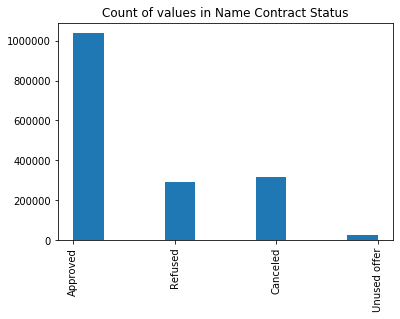

In [119]:
#Plot for Name Contract Status count
plt.hist(df_p['NAME_CONTRACT_STATUS'])
plt.xticks(rotation = 90)
plt.title('Count of values in Name Contract Status')
plt.show()

In [120]:
#Get the exact numbers of count in Name Contract Status
df_p['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036780
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [121]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670213 entries, 0 to 1670213
Data columns (total 18 columns):
SK_ID_PREV              1670213 non-null int64
SK_ID_CURR              1670213 non-null int64
NAME_CONTRACT_TYPE      1670213 non-null object
AMT_ANNUITY             1297978 non-null float64
AMT_APPLICATION         1670213 non-null float64
AMT_CREDIT              1670213 non-null float64
NAME_CONTRACT_STATUS    1670213 non-null object
NAME_PAYMENT_TYPE       1670213 non-null object
CODE_REJECT_REASON      1670213 non-null object
NAME_CLIENT_TYPE        1670213 non-null object
NAME_GOODS_CATEGORY     1670213 non-null object
NAME_PORTFOLIO          1670213 non-null object
NAME_PRODUCT_TYPE       1670213 non-null object
CHANNEL_TYPE            1670213 non-null object
NAME_SELLER_INDUSTRY    1670213 non-null object
CNT_PAYMENT             1297983 non-null float64
NAME_YIELD_GROUP        1670213 non-null object
PRODUCT_COMBINATION     1669867 non-null object
dtypes: float64(4), i

In [122]:
df_p.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,Approved,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,Refused,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,24.0,high,Cash Street: high


In [123]:
df_p['NAME_GOODS_CATEGORY'].value_counts()

XNA                         950808
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

In [124]:
#Replace XNA value with NaN
df_p[['NAME_GOODS_CATEGORY']] = df_p[['NAME_GOODS_CATEGORY']].replace('XNA', np.nan)

In [128]:
df_p.isnull().sum()/len(df_p)*100

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
NAME_CONTRACT_TYPE       0.000000
AMT_ANNUITY             22.286678
AMT_APPLICATION          0.000000
AMT_CREDIT               0.000000
NAME_CONTRACT_STATUS     0.000000
NAME_PAYMENT_TYPE        0.000000
CODE_REJECT_REASON       0.000000
NAME_CLIENT_TYPE         0.000000
NAME_PORTFOLIO           0.000000
NAME_PRODUCT_TYPE        0.000000
CHANNEL_TYPE             0.000000
NAME_SELLER_INDUSTRY     0.000000
CNT_PAYMENT             22.286379
NAME_YIELD_GROUP         0.000000
PRODUCT_COMBINATION      0.020716
dtype: float64

The null values count here is quite large around 50% od the dataset, so removing this field from dataset.

In [127]:
# Remove the field with null values more than 50%
del df_p['NAME_GOODS_CATEGORY']

KeyError: 'NAME_GOODS_CATEGORY'

In [366]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670213 entries, 0 to 1670213
Data columns (total 17 columns):
SK_ID_PREV              1670213 non-null int64
SK_ID_CURR              1670213 non-null int64
NAME_CONTRACT_TYPE      1670213 non-null object
AMT_ANNUITY             1297978 non-null float64
AMT_APPLICATION         1670213 non-null float64
AMT_CREDIT              1670213 non-null float64
NAME_CONTRACT_STATUS    1670213 non-null object
NAME_PAYMENT_TYPE       1670213 non-null object
CODE_REJECT_REASON      1670213 non-null object
NAME_CLIENT_TYPE        1670213 non-null object
NAME_PORTFOLIO          1670213 non-null object
NAME_PRODUCT_TYPE       1670213 non-null object
CHANNEL_TYPE            1670213 non-null object
NAME_SELLER_INDUSTRY    1670213 non-null object
CNT_PAYMENT             1297983 non-null float64
NAME_YIELD_GROUP        1670213 non-null object
PRODUCT_COMBINATION     1669867 non-null object
dtypes: float64(4), int64(2), object(11)
memory usage: 229.4+ MB


In [129]:
# Get the count of values in Code Reject reason
df_p['CODE_REJECT_REASON'].value_counts()

XAP       1353092
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

In [130]:
#Replace XAP value with NaN
df_p[['CODE_REJECT_REASON']] = df_p[['CODE_REJECT_REASON']].replace('XAP', np.nan)

In [131]:
df_p.isnull().sum()/len(df_p)*100

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
NAME_CONTRACT_TYPE       0.000000
AMT_ANNUITY             22.286678
AMT_APPLICATION          0.000000
AMT_CREDIT               0.000000
NAME_CONTRACT_STATUS     0.000000
NAME_PAYMENT_TYPE        0.000000
CODE_REJECT_REASON      81.013140
NAME_CLIENT_TYPE         0.000000
NAME_PORTFOLIO           0.000000
NAME_PRODUCT_TYPE        0.000000
CHANNEL_TYPE             0.000000
NAME_SELLER_INDUSTRY     0.000000
CNT_PAYMENT             22.286379
NAME_YIELD_GROUP         0.000000
PRODUCT_COMBINATION      0.020716
dtype: float64

80% Null Values in column Code Reject Reason, so removing this column from dataset.

In [132]:
del df_p['CODE_REJECT_REASON']

In [133]:
# Get the count of values for field Name Client type
df_p['NAME_CLIENT_TYPE'].value_counts()

Repeater     1231260
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

In [134]:
#Replace XNA value with NaN
df_p[['NAME_CLIENT_TYPE']] = df_p[['NAME_CLIENT_TYPE']].replace('XNA', np.nan)

In [135]:
# Remove the null values
df_p = df_p[~(df_p['NAME_CLIENT_TYPE'].isnull())]

In [136]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1668272 entries, 0 to 1670213
Data columns (total 16 columns):
SK_ID_PREV              1668272 non-null int64
SK_ID_CURR              1668272 non-null int64
NAME_CONTRACT_TYPE      1668272 non-null object
AMT_ANNUITY             1297077 non-null float64
AMT_APPLICATION         1668272 non-null float64
AMT_CREDIT              1668272 non-null float64
NAME_CONTRACT_STATUS    1668272 non-null object
NAME_PAYMENT_TYPE       1668272 non-null object
NAME_CLIENT_TYPE        1668272 non-null object
NAME_PORTFOLIO          1668272 non-null object
NAME_PRODUCT_TYPE       1668272 non-null object
CHANNEL_TYPE            1668272 non-null object
NAME_SELLER_INDUSTRY    1668272 non-null object
CNT_PAYMENT             1297082 non-null float64
NAME_YIELD_GROUP        1668272 non-null object
PRODUCT_COMBINATION     1667926 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 216.4+ MB


In [137]:
# Get the value counts of name product type
df_p['NAME_PRODUCT_TYPE'].value_counts()

XNA        1062154
x-sell      455945
walk-in     150173
Name: NAME_PRODUCT_TYPE, dtype: int64

In [138]:
#Replace XNA value with NaN
df_p[['NAME_PRODUCT_TYPE']] = df_p[['NAME_PRODUCT_TYPE']].replace('XNA', np.nan)

In [139]:
df_p.isnull().sum()/len(df_p)*100

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
NAME_CONTRACT_TYPE       0.000000
AMT_ANNUITY             22.250269
AMT_APPLICATION          0.000000
AMT_CREDIT               0.000000
NAME_CONTRACT_STATUS     0.000000
NAME_PAYMENT_TYPE        0.000000
NAME_CLIENT_TYPE         0.000000
NAME_PORTFOLIO           0.000000
NAME_PRODUCT_TYPE       63.667915
CHANNEL_TYPE             0.000000
NAME_SELLER_INDUSTRY     0.000000
CNT_PAYMENT             22.249969
NAME_YIELD_GROUP         0.000000
PRODUCT_COMBINATION      0.020740
dtype: float64

NAME_PRODUCT_TYPE - Null value count is around 53%, too high to be considered. Dropping this column.

In [140]:
#Remove NAME_PRODUCT_TYPE from dataset
del df_p['NAME_PRODUCT_TYPE']

In [141]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1668272 entries, 0 to 1670213
Data columns (total 15 columns):
SK_ID_PREV              1668272 non-null int64
SK_ID_CURR              1668272 non-null int64
NAME_CONTRACT_TYPE      1668272 non-null object
AMT_ANNUITY             1297077 non-null float64
AMT_APPLICATION         1668272 non-null float64
AMT_CREDIT              1668272 non-null float64
NAME_CONTRACT_STATUS    1668272 non-null object
NAME_PAYMENT_TYPE       1668272 non-null object
NAME_CLIENT_TYPE        1668272 non-null object
NAME_PORTFOLIO          1668272 non-null object
CHANNEL_TYPE            1668272 non-null object
NAME_SELLER_INDUSTRY    1668272 non-null object
CNT_PAYMENT             1297082 non-null float64
NAME_YIELD_GROUP        1668272 non-null object
PRODUCT_COMBINATION     1667926 non-null object
dtypes: float64(4), int64(2), object(9)
memory usage: 203.6+ MB


In [142]:
df_p['CHANNEL_TYPE'].isnull().sum()

0

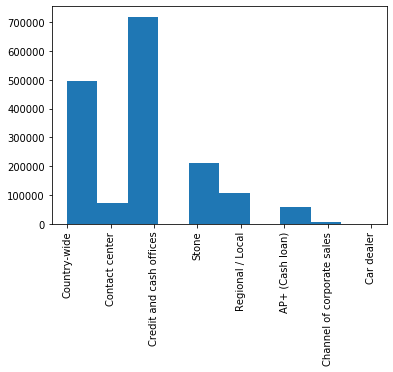

In [143]:
#Get the count of Channel type for previous application of customers
plt.hist(df_p['CHANNEL_TYPE'])
plt.xticks(rotation = 90)
plt.show()

In [144]:
#Get the count of column Name Seller Industry
df_p['NAME_SELLER_INDUSTRY'].value_counts()

XNA                     854315
Consumer electronics    398016
Connectivity            275846
Furniture                57813
Construction             29761
Clothing                 23926
Industry                 19194
Auto technology           4984
Jewelry                   2695
MLM partners              1209
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

In [145]:
#Replace XNA value with NaN
df_p[['NAME_SELLER_INDUSTRY']] = df_p[['NAME_SELLER_INDUSTRY']].replace('XNA', np.nan)

In [146]:
df_p.isnull().sum()/len(df_p)*100

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
NAME_CONTRACT_TYPE       0.000000
AMT_ANNUITY             22.250269
AMT_APPLICATION          0.000000
AMT_CREDIT               0.000000
NAME_CONTRACT_STATUS     0.000000
NAME_PAYMENT_TYPE        0.000000
NAME_CLIENT_TYPE         0.000000
NAME_PORTFOLIO           0.000000
CHANNEL_TYPE             0.000000
NAME_SELLER_INDUSTRY    51.209575
CNT_PAYMENT             22.249969
NAME_YIELD_GROUP         0.000000
PRODUCT_COMBINATION      0.020740
dtype: float64

In [147]:
# Delete the fields with more than 50% of null values
del df_p['NAME_SELLER_INDUSTRY']

In [148]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1668272 entries, 0 to 1670213
Data columns (total 14 columns):
SK_ID_PREV              1668272 non-null int64
SK_ID_CURR              1668272 non-null int64
NAME_CONTRACT_TYPE      1668272 non-null object
AMT_ANNUITY             1297077 non-null float64
AMT_APPLICATION         1668272 non-null float64
AMT_CREDIT              1668272 non-null float64
NAME_CONTRACT_STATUS    1668272 non-null object
NAME_PAYMENT_TYPE       1668272 non-null object
NAME_CLIENT_TYPE        1668272 non-null object
NAME_PORTFOLIO          1668272 non-null object
CHANNEL_TYPE            1668272 non-null object
CNT_PAYMENT             1297082 non-null float64
NAME_YIELD_GROUP        1668272 non-null object
PRODUCT_COMBINATION     1667926 non-null object
dtypes: float64(4), int64(2), object(8)
memory usage: 190.9+ MB


In [149]:
# Get the value counts of Name Yield Group
df_p['NAME_YIELD_GROUP'].value_counts()

XNA           516070
middle        385220
high          353261
low_normal    321773
low_action     91948
Name: NAME_YIELD_GROUP, dtype: int64

In [150]:
#Get the count of null values of Product Combination
df_p['PRODUCT_COMBINATION'].isnull().sum()

346

In [151]:
#Replace XNA value with NaN
df_p[['NAME_YIELD_GROUP']] = df_p[['NAME_YIELD_GROUP']].replace('XNA', np.nan)

In [152]:
#Removing null values data from the column in dataset
df_p = df_p[~(df_p['NAME_YIELD_GROUP'].isnull())]

In [153]:
#check the null values count of dataset columns
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152202 entries, 0 to 1670213
Data columns (total 14 columns):
SK_ID_PREV              1152202 non-null int64
SK_ID_CURR              1152202 non-null int64
NAME_CONTRACT_TYPE      1152202 non-null object
AMT_ANNUITY             1152198 non-null float64
AMT_APPLICATION         1152202 non-null float64
AMT_CREDIT              1152202 non-null float64
NAME_CONTRACT_STATUS    1152202 non-null object
NAME_PAYMENT_TYPE       1152202 non-null object
NAME_CLIENT_TYPE        1152202 non-null object
NAME_PORTFOLIO          1152202 non-null object
CHANNEL_TYPE            1152202 non-null object
CNT_PAYMENT             1152202 non-null float64
NAME_YIELD_GROUP        1152202 non-null object
PRODUCT_COMBINATION     1152202 non-null object
dtypes: float64(4), int64(2), object(8)
memory usage: 131.9+ MB


In [154]:
# On Anlyzing dataset fields, few columns can be removed from the dataset

del df_p['SK_ID_PREV']
del df_p['CHANNEL_TYPE']
del df_p['CNT_PAYMENT']

In [155]:
#Replace XNA with null in Name Payment Amount
df_p[['NAME_PAYMENT_TYPE']]=df_p[['NAME_PAYMENT_TYPE']].replace('XNA',np.nan)

In [156]:
#Remove the null records from the column in dataset
df_p = df_p[~(df_p['NAME_PAYMENT_TYPE'].isnull())]

In [157]:
#check the shape of dataset - application
df_a.shape

(307507, 25)

In [158]:
#check the shape of dataset - previous application
df_p.shape

(1005473, 11)

#### Lets Observe and Understand the Payment consistency in Loan Annuity Trend for Previous application based on Housing Type of Customers

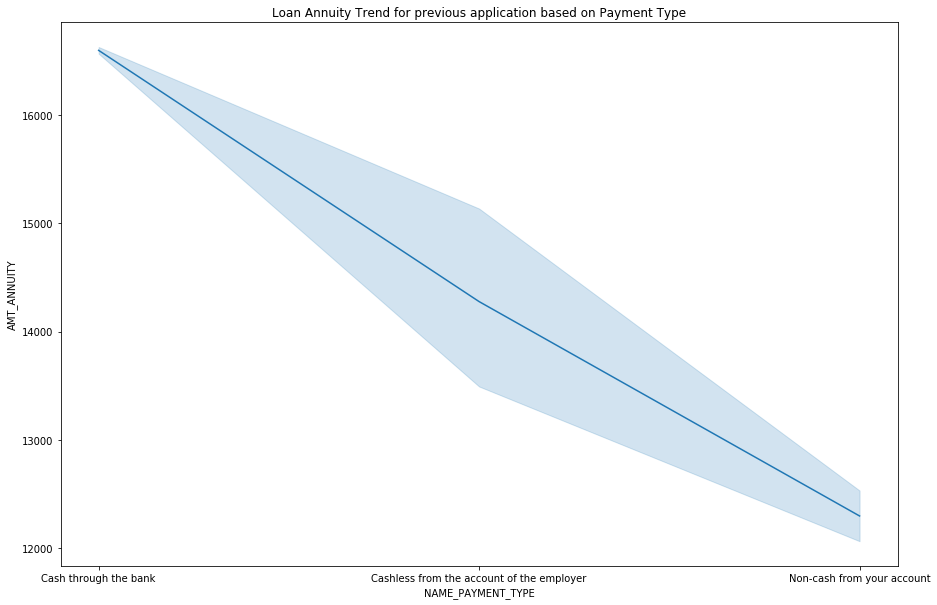

In [159]:
# Plot the graph for name payment type and amount annuity for previous application
plt.figure(figsize=(15,10))

sns.lineplot(data=df_p, x="NAME_PAYMENT_TYPE", y="AMT_ANNUITY")
plt.title('Loan Annuity Trend for previous application based on Payment Type')
plt.show()

As per the graph above, it can be inferred that the amount annuity is higher when customer pay through bank and it decreases when takem from the account of the employer and this trend goes on when there is no cash payment from account.

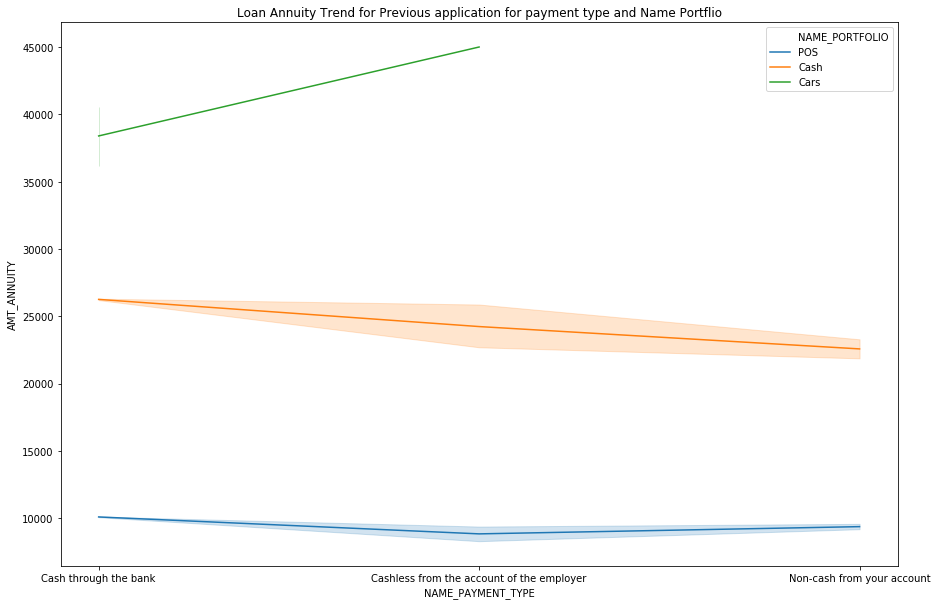

In [160]:
# Plot the graph for name payment type and amount annuity for previous application on Name Portfolio
plt.figure(figsize=(15,10))

sns.lineplot(data=df_p, x="NAME_PAYMENT_TYPE", y="AMT_ANNUITY",hue = 'NAME_PORTFOLIO')
plt.title('Loan Annuity Trend for Previous application for payment type and Name Portflio')
plt.show()

From above two trends of Loan Annuity for Previous application, we can ascertain that customers who are paying with cars have relatively higher annual loan annuity that means they have higher loans payment which provides good business to bank/financial instituions. 

##### Lets check How Income impacts the Payment consistency in Loan Annuity Trend for Current application and Previous application based on Housing Type of Customers

In [161]:
# Get the Pivot table for Name Housing Type, Amount Annuity and Total Income from Current application
Payment_Trend_Housing_Type = pd.pivot_table(data=df_a0, index = ['NAME_HOUSING_TYPE'], values = ['AMT_ANNUITY','AMT_INCOME_TOTAL'])

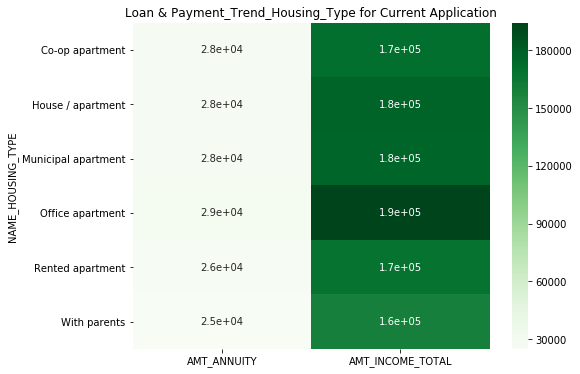

In [162]:

plt.figure(figsize=(8,6))
C_F = sns.heatmap(Payment_Trend_Housing_Type,cmap='Greens',annot=True)
bottom,top = C_F.get_ylim()
C_F.set_ylim(bottom+0.5,top-0.5)
plt.title('Loan & Payment_Trend_Housing_Type for Current Application')
plt.show()

Customer who lives in Office Apartment, have usually higher income and lowest payment issue in paying Loan EMIs.
So, Customer with Office Apartment could be the safest client to handover the loan amount.
Loan Annuity also increased from previous application loan amount to current one for customer who has Office Apartment.

#### Lets have a look into the trend of previous payment when credit amount recieved is lower than the applied amount.

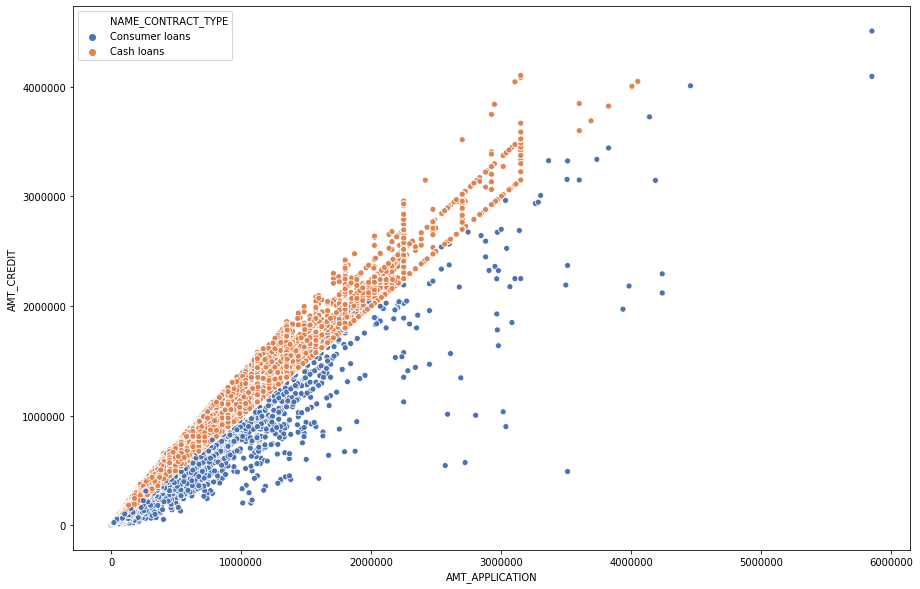

In [163]:
# Plot the graph for previous application on application amount and Credit Amount
plt.figure(figsize=(15,10))

sns.scatterplot(data=df_p, x="AMT_APPLICATION", y="AMT_CREDIT",hue='NAME_CONTRACT_TYPE',palette="deep")
plt.show()

The trend above shows that with the higher loan application the loan credit amount goes higher to Consumer loan than cash loans. It is also evident that the Credit  amount is usally lower than the applied amount for Consumer Loan.


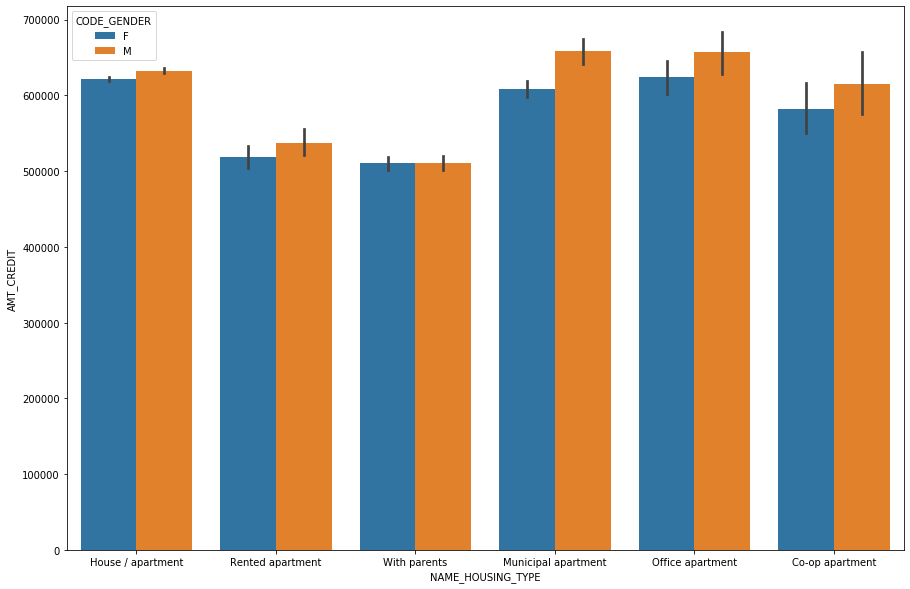

In [164]:
# Plot the graph for current application on Housing type and Credit Amount
plt.figure(figsize=(15,10))

sns.barplot(data=df_a0, x="NAME_HOUSING_TYPE", y="AMT_CREDIT",hue = 'CODE_GENDER')
plt.show()

The Customers have lower credit amount who stay with their parents, however, the payment issue still remains there. The Overall percentage of missing payments is definitely low with the customers who stay with their parents but , as mentioned earlier, the business is also very low from them due to lowest credit amount.

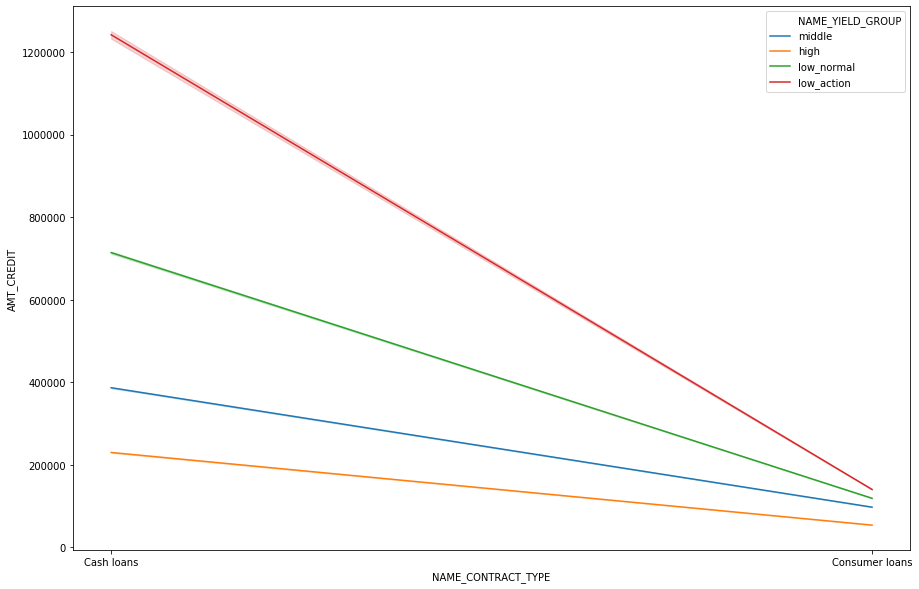

In [165]:
# Plot the graph for previous application on Contract type and Credit Amount
plt.figure(figsize=(15,10))

sns.lineplot(data=df_p, x="NAME_CONTRACT_TYPE", y="AMT_CREDIT",hue = 'NAME_YIELD_GROUP')
plt.show()

Name Yield group with low action tends to have lowest credit amount for consumer loan. There is a drastic fall can be seen on low action yield group for credit amount from cash loan to consumer.

## Inferences

#### Cases when Bank should beware of customers who can default

1. Customers with lower income should not be given higher credit amount as they will not be able manage the EMIs with regular expenses.
2. It was observed that Female with lower income group tends to default more especially in Private service staff, Medicine Staff and Cleaning Staff. That might be due to low income they have.
3. Customers with higher age group tends to have more inconsisteent payment, this might be due to added responsiblities and unable to manage EMIs.
4. Customer with Family Status- Married and more dependents tends to have more inconsistent payments, this might be due to the more dependents they fall short of money to pay EMIs. .
5. Male Customers tends to have inconsistencies in payments for age above 40 and income around 20-30 lakhs.
6. Female customer has relatively high inconsistent payment whose income is below 500000.
7. Customer who are older female customers for income ranges from 15 lakhs to 21 lakhs tends to have inconsistent payments.
8. Female in Maternity leave have lower income and so there are inconsistencies that can be seen in payments.


#### Cases when Bank should focus on customers who can provide good business and pay EMIs on time


1. Customer with lower credit amount and higher salary usually make payments on time.
2. Customers with higher income, makes payment consistently even for higher credit.
3. Male customer having lower income and 1-3 dependents are quite good in paying EMIs on time.
4. Customers with lower age and higher salary with realty have good payment record.
5. Customer with Single Family Status tends to have good payment record despite of having higher dependents. 
6. Pensioner should be given lower credit amount to stay safe as their income is low.
7. Businessman can be given higher credit amount whose income is usually higher than other income groups.
